In [1]:
import os
import numpy as np
import pandas as pd
from Bio.pairwise2 import format_alignment
from Bio.SubsMat import MatrixInfo 
from Bio import pairwise2
from Bio import SeqIO, SearchIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML

from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.PhyloXML import Phylogeny
from Bio import Phylo

from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
blast_id = True

/opt/conda/lib/python3.7/site-packages/Bio/SubsMat/__init__.py:131: BiopythonDeprecationWarning: Bio.SubsMat has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.substitution_matrices as a replacement, and contact the Biopython developers if you still need the Bio.SubsMat module.
  BiopythonDeprecationWarning,


BLAST 
FASTA

Biological Sequence Alphabets

Two sets of alphabets are used in bioinformatics,Nucleotides, Amino Acids

ABC (I/II)
Nucleic Acids

molecules with a biological role we can find nucleic acids

Nucleic acids encode and express the genetic code that is kept within the cell. 
There are two major types of nucleic acids 
DeoxyriboNucleic Acid (DNA)
RiboNucleic Acid (RNA) (Obtainable via transcription)
DNA contains the information necessary to build a cell, and keep it functioning. 
In eukaryotic cells, DNA will be found in the nucleus, whilst in the prokaryotic cells, it will be found in the cytoplasm. 
IUPAC defines the full list of nucleotides as shown in the table below, with A,T,G,C being the main four:
Another type of nucleotide list often used is IUB Ambiguity Codes

ABC (II/II)
Amino Acids
Amino acids building blocks of proteins which are macromolecules that perform most of the functions inside a cell
Proteins have a broad range of functions spanning from catalytic to structural functions

Enzymes : Type of abundant proteins that promote chemical reactions and convert certain molecules into other types of molecules required for the functioning of the cell.
Carbohydrates : Serve as energy storage, both for immediate and long term energy demands.
Lipids : Part of the plasma membrane, doing signaling and energy storage.
The cell also contains other components of varying complexity. Of importance: 
Mitochondria & the Chloroplasts : Organelles involved in the production of energy. 
Ribosomes : Large and complex molecules composed of a mixture of genetic material, req. to assemble proteins and play a central role in the flow of genetic information.

### DNA Strands
 
### COMPLEMENTARY STRANDS IN DNA

DNA is a molecule composed of two complementary strands that form and stick together due to the connections established between the nucleotides in both strands. 

This is made possible by due to the chemical phenomenon where Adenine (A) bonds only with Thymine (T) nucleotides, as a result of two hydrogen connections. 
Similarly,Guanine (G) bonds only with Cytosine (C) nucleotides by three hydrogen connections.

### REVERSE COMPLEMENT

This results in two complementary and anti-parallel strands (connected in opposite directions), if we know the nucleotide sequence in one of the strands, we can get the sequence in the opposite strand by taking the complement of its nucleotides, which are also read backwards, thus we have the reverse complement of the other strand.

It has become a standard to describe the DNA though only one of the strands, due to this complementarity using [A,T,G,C]
The existence of these two strands is essential in order to pass on genetic information to new cells and produce proteins.

# Sequence Definition

Python Strings to Sequences
SMALLER SEQUENCES

When a sequence are quite short (eg. when we are looking at part of the entire DNA sequence), we can probably just define them using the string format.

To use some operations with this sequence in biopython (eg. sequence alignment), we need to create an instance of the Seq class for each sequence.
In previous biopython versions, we had to specify the sequence type (eg. <code>IUPAC.protein</code>), however this is not necessary in recent versions.

In [2]:
n = 'ATGACGGATCAGCCGCAAGCGGAATTGGCGTTTACGTACGATGCGCCGTAA'  # nucleotide sequence
aa = 'MMMELQHQRLMALAGQLQLESLISAAPALSQQAVDQEWSYMDFLEHLLHE' # protein sequence

seq_n = Seq(n)
seq_aa = Seq(aa)

## SIMPLE SEQUENCE OPERATION

Since we don't have .alphabet details, rename sequence type to give them names accordingly.

In [3]:
print(seq_n.reverse_complement()) # possible
print(seq_aa.reverse_complement()) # not actually possible

TTACGGCGCATCGTACGTAAACGCCAATTCCGCTTGCGGCTGATCCGTCAT
EDLLDELFHKRSWEQHBTQQSLTPTTSILSELQLQCTLTKLYQDQLEKKK


## Sequence Annotation Objects

Sequence files obtained from databases provied the option to for more detailed information storage about the sequence, not just the sequence alone.

In BioPython, we can use SeqRecord objects with our defined Seq object instances & add define additional information about our sequence(s).

Two commonly added detailed information about a sequence:
Annotations( Extra metadata information about the sequence )
Features( Extra information about the sequence content, which is extractable ) 

SeqRecord objects are used in Biopython to hold a sequence (as a Seq object) with identifiers (ID and name), description and optionally annotation and sub-features.

SeqRecord is class we'd use when we want to work with Seq that have more information about the sequence, grouped all in one spot.

If we wanted to do multiple sequence alignment, we have to define each individual sequences in the SeqRecord object, which requires just the id to be defined.

SeqRecord objects can store:
seq - The sequence itself (Seq() objects )
id - Sequence identifier
name - Sequence name 
description - Description of the sequence
annotations - Global annotations for the whole sequence (dic)
features - Structured features (lst of SeqFeature objects)
letter_annotations - Annotations for each letter (position) in the sequence
dexrefs - References to databases

## SEQRECORD ANNOTATIONS & SAVING SEQUENCE FILE
SeqRecord can hold information about different annotations for the sequence in question.
Let's define some basic annotations for SeqRec below, which we can subsequently save using SeqIO using the minimalistic FASTA detailed Genbank formats.

In [4]:
seq_record = SeqRecord(seq_n)

seq_record.id = "ABC12345"
seq_record.description = 'Neucleotide sequence'
seq_record.annotations['molecule_type'] = 'DNA'
SeqIO.write(seq_record,"/kaggle/working/my_seq.fasta","fasta")
SeqIO.write(seq_record,"/kaggle/working/my_seq.gb","genbank")

1

In [5]:
# As we can see FASTA doesn't seem to save the annotations data
print('FASTA Annotations:')
read_seq1 = SeqIO.read('/kaggle/working/my_seq.fasta','fasta')
print(read_seq1.annotations)  # annotations

# Whereas Genbank does
print('GenBank Annotations')
read_seq2 = SeqIO.read('/kaggle/working/my_seq.gb','genbank')
print(read_seq2.annotations)  # annotations

FASTA Annotations:
{}
GenBank Annotations
{'molecule_type': 'DNA', 'data_file_division': 'UNK', 'date': '01-JAN-1980', 'accessions': ['ABC12345'], 'keywords': [''], 'source': '', 'organism': '.', 'taxonomy': []}


## SEQRECORD FEATURES

Real sequences can be very long & contain useful subset sequences that one might be interested in.
Feature descriptions can be quite useful; if we want to define subsets of the sequence to which a feature is applicable.

Some SeqFeature object attributes:
location - Indicator of which region the annotation applies (FeatureLocation object )
type - Feature type (string)
qualifiers - Additional Info (dict)

In [6]:
from Bio import SeqFeature

# Define locations 
s0 = SeqFeature.AfterPosition(10) # exact location
s1 = SeqFeature.BetweenPosition(40,left=35,right=40) # fuzzy location (range)
location = SeqFeature.FeatureLocation(s0,s1) # define the feature location
print(f'Feature Location Notation: {location}')

Feature Location Notation: [>10:(35^40)]


In [7]:
# Example for a gene feature

unitig = Seq('GTGCGACAGCAAAGTCCAAACCAGCGTCCCCGCC')
feature = SeqFeature.SeqFeature(SeqFeature.FeatureLocation(5,10), # location (shorter)
                                type='gene', # the specified type of the feature
                                strand=-1  # -1 indicates the minus strand (reverse_complement)
                               )

# If we wanted to extract the feature
feature_seq = feature.extract(unitig)
print(feature_seq)

GCTGT


In [8]:
seq_record = SeqRecord(unitig)

seq_record.id = "ABC12345"
seq_record.description = 'Neisseria gonorrhoeae unitig'
seq_record.annotations['molecule_type'] = 'DNA'
seq_record.features = [feature]

In [9]:
# We can write to gb file & see our stored data
SeqIO.write(seq_record,"/kaggle/working/my_seq.gb","genbank")
read_seq2 = SeqIO.read('/kaggle/working/my_seq.gb','genbank')
print(read_seq2.features)  # annotations

# define one of the features from the list
feature = read_seq2.features[0]

# Extracted feature
feature_seq = feature.extract(read_seq2)
print('\nExtracted Feature:')
print(feature_seq)

[SeqFeature(FeatureLocation(ExactPosition(5), ExactPosition(10), strand=-1), type='gene')]

Extracted Feature:
ID: <unknown id>
Name: <unknown name>
Description: <unknown description>
Number of features: 1
Seq('GCTGT')


## Reading Sequence Files

Common Formats

BioPython, FASTA & GenBank file formats can be read using BioPython's Bio.SeqIO class.

### SIMPLE OR COMPLEX FORMAT

FASTA is quite a generic format & can be used to store multiple sequences & even alignments as well.
FASTA is definitely less detailed & very minimalistic when it comes to content, usually only containing a description & sequence.
GenBank files on the other hand tend to be very detailed when it comes to the sequence description.

### FASTA Format

In bioinformatics and biochemistry, the FASTA format is a text-based format for representing either nucleotide sequences or amino acid (protein) sequences, in which nucleotides or amino acids are represented using single-letter codes. The format also allows for sequence names and comments to precede the sequences. 

The format originates from the FASTA software package, but has now become a near universal standard in the field of bioinformatics.

### READING SINGLE SEQUENCE FILES
The FASTA format can actually contain multiple sequences in one file & we need to read them slightly differently.
SeqIO.read() is used for reading single sequence files, else we get an error More than one record found in handle.

In [10]:
''' FASTA formats w/ one sequence '''

single_fasta = '/kaggle/input/biopython-genbank/example.fasta' # nuceotide seq
fasta_n = SeqIO.read(single_fasta,'fasta')
print(f'FASTA Content:')
print(fasta_n)      # Print fasta file information

print(f'\nNumber of Nucleotides: {len(fasta_n)}') # number of nucleotides
seq_fasta = fasta_n.seq # Extract Sequence

print('\nFeatures & Annotations:')
print(fasta_n.features)     # some files contain just the basic details
print(fasta_n.annotations)  

FASTA Content:
ID: HSBGPG
Name: HSBGPG
Description: HSBGPG Human gene for bone gla protein (BGP)
Number of features: 0
Seq('GGCAGATTCCCCCTAGACCCGCCCGCACCATGGTCAGGCATGCCCCTCCTCATC...AAG')

Number of Nucleotides: 1231

Features & Annotations:
[]
{}


### READING MULTIPLE SEQUENCE FILES
SeqIO.parse() is used for reading multiple sequence files, which returns an iterator, that can be used to cycle through and get the sequences.

In [11]:
''' FASTA formats w/ multile sequences '''

multi_fasta = '/kaggle/input/biopython-genbank/NC_005816.faa' # protein seq
iter_multi_fasta_aa = SeqIO.parse(multi_fasta,'fasta') # returns an interator

lst_fasta_aa = []
for seq_aa in iter_multi_fasta_aa:
    lst_fasta_aa.append(seq_aa)
    
print(f'Number of Sequences read: {len(lst_fasta_aa)}')
print(f'\nFirst Sequence: \n{lst_fasta_aa[0]}')

Number of Sequences read: 10

First Sequence: 
ID: gi|45478712|ref|NP_995567.1|
Name: gi|45478712|ref|NP_995567.1|
Description: gi|45478712|ref|NP_995567.1| putative transposase [Yersinia pestis biovar Microtus str. 91001]
Number of features: 0
Seq('MVTFETVMEIKILHKQGMSSRAIARELGISRNTVKRYLQAKSEPPKYTPRPAVA...GVA')


### GenBank Format

The Genbank format allows for the storage of information in addition to a DNA/protein sequence. It holds much more information than the FASTA format. Formats similar to Genbank have been developed by ENA (EMBL format) and by DDBJ (DDBJ format).

**COMPATIBILITY WITH DATABASES**

Primary databases have developed highly structured data file formats that enable the storage of all of these additional data that accompany the otherwise “naked” DNA sequence encoded in a FASTA file. The strict layout is necessary for the file to be compatible with a range of computer programs. Each of the three primary databases have their own sequence file format layout. However, all of them contain almost the same fields and the same information, making them interchangeable.

Like FASTA GenBank files can store more than one sequence & are read in exactly the same way as shown above using class SeqIO. (.read & .parse)
However as indicated above, they tend to contain much more in depth information about the sequence, content of the nature storable in the SeqRecord class object.

They can store both Annotations & Features, which makes this format very useful.

In [12]:
file_gb = '/kaggle/input/biopython-genbank/example.gb'

''' Read GenBank format '''
# GenBank format are more comprehnsive than fasta.

gb = SeqIO.read(file_gb,'genbank')
seq_gb = gb.seq # store sequence 

print('Print Seq (preview)')
print(gb.seq[:40])

print('\nLength of Sequence:')
print(len(gb.seq))

print('\nRecord ID:')
print(gb.id)

print('\nName:')
print(gb.name)

print('\nDescription:')
print(gb.description)

# Annotations 
print('\nNumber of Annotations:')
print(len(gb.annotations))

# Features 
print('\nNumber of Features:')
print(len(gb.features))

Print Seq (preview)
TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTG

Length of Sequence:
9609

Record ID:
NC_005816.1

Name:
NC_005816

Description:
Yersinia pestis biovar Microtus str. 91001 plasmid pPCP1, complete sequence

Number of Annotations:
13

Number of Features:
41


### ANNOTATION CONTENT
We can visualise the annotation content (if it is present) using .annotations.
Being a dictionary, we can get see what sort annotations are present by calling .annotations.keys().

In [13]:
# annotations field; dic that provides a number of properties for the seq
print('Annotations dictionary:\n')
print(gb.annotations)

print('\nKeys:')
print(gb.annotations.keys())

Annotations dictionary:

{'molecule_type': 'DNA', 'topology': 'circular', 'data_file_division': 'BCT', 'date': '21-JUL-2008', 'accessions': ['NC_005816'], 'sequence_version': 1, 'gi': '45478711', 'keywords': [''], 'source': 'Yersinia pestis biovar Microtus str. 91001', 'organism': 'Yersinia pestis biovar Microtus str. 91001', 'taxonomy': ['Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Enterobacteriales', 'Enterobacteriaceae', 'Yersinia'], 'references': [Reference(title='Genetics of metabolic variations between Yersinia pestis biovars and the proposal of a new biovar, microtus', ...), Reference(title='Complete genome sequence of Yersinia pestis strain 91001, an isolate avirulent to humans', ...), Reference(title='Direct Submission', ...), Reference(title='Direct Submission', ...)], 'comment': 'PROVISIONAL REFSEQ: This record has not yet been subject to final\nNCBI review. The reference sequence was derived from AE017046.\nCOMPLETENESS: full length.'}

Keys:
dict_keys(['molecule_t

In [14]:
# Getting specific key values
print('\nGet specific parts of the annotation:\n')
print('Taxonomy:\n')
print(gb.annotations['taxonomy'])

print('Source:\n')
print(gb.annotations['source'])

print('Date:\n')
print(gb.annotations['date'])

print('gi number:\n')
print(gb.annotations['gi'])


Get specific parts of the annotation:

Taxonomy:

['Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Enterobacteriales', 'Enterobacteriaceae', 'Yersinia']
Source:

Yersinia pestis biovar Microtus str. 91001
Date:

21-JUL-2008
gi number:

45478711


### SHOWING FEATURES CONTENT
If there are any features present in the file, we can get the by calling .features 
Subsets of the sequence can be extracted .extract() from the The list of SeqFeature objects.

In [15]:
gb.features[:5] # show only a few features (total=41)

[SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(9609), strand=1), type='source'),
 SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(1954), strand=1), type='repeat_region'),
 SeqFeature(FeatureLocation(ExactPosition(86), ExactPosition(1109), strand=1), type='gene'),
 SeqFeature(FeatureLocation(ExactPosition(86), ExactPosition(1109), strand=1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(86), ExactPosition(959), strand=1), type='misc_feature')]

### EXPLORING THE "GENE" FEATURE TYPE
One of the features .type that is used in .features is "gene".
cycling through all features & get all the annotated genes in the whole sequence.
Exploring these genes, we can get their locus tag (from qualifiers), database reference (from qualifiers), strand & location.
We can apply an operation called translate to try to find the proteins that the gene feature encode

In [16]:
gene_features = []
for i in range(len(gb.features)):
    if(gb.features[i].type == 'gene'):
        gene_features.append(gb.features[i])

print(f'Number of gene features: {len(gene_features)}')
gene_features

Number of gene features: 10


[SeqFeature(FeatureLocation(ExactPosition(86), ExactPosition(1109), strand=1), type='gene'),
 SeqFeature(FeatureLocation(ExactPosition(1105), ExactPosition(1888), strand=1), type='gene'),
 SeqFeature(FeatureLocation(ExactPosition(2924), ExactPosition(3119), strand=1), type='gene'),
 SeqFeature(FeatureLocation(ExactPosition(3485), ExactPosition(3857), strand=1), type='gene'),
 SeqFeature(FeatureLocation(ExactPosition(4342), ExactPosition(4780), strand=1), type='gene'),
 SeqFeature(FeatureLocation(ExactPosition(4814), ExactPosition(5888), strand=-1), type='gene'),
 SeqFeature(FeatureLocation(ExactPosition(6004), ExactPosition(6421), strand=1), type='gene'),
 SeqFeature(FeatureLocation(ExactPosition(6663), ExactPosition(7602), strand=1), type='gene'),
 SeqFeature(FeatureLocation(ExactPosition(7788), ExactPosition(8088), strand=-1), type='gene'),
 SeqFeature(FeatureLocation(ExactPosition(8087), ExactPosition(8360), strand=-1), type='gene')]

In [17]:
# Gene Qualifiers
gene_features[0].qualifiers

OrderedDict([('locus_tag', ['YP_pPCP01']), ('db_xref', ['GeneID:2767718'])])

In [18]:
for feat in gene_features:
    print(f"locus tag: {feat.qualifiers['locus_tag']}, database ref: {feat.qualifiers['db_xref']}, strand: {feat.strand}, location: {feat.location}")

locus tag: ['YP_pPCP01'], database ref: ['GeneID:2767718'], strand: 1, location: [86:1109](+)
locus tag: ['YP_pPCP02'], database ref: ['GeneID:2767716'], strand: 1, location: [1105:1888](+)
locus tag: ['YP_pPCP03'], database ref: ['GeneID:2767717'], strand: 1, location: [2924:3119](+)
locus tag: ['YP_pPCP04'], database ref: ['GeneID:2767720'], strand: 1, location: [3485:3857](+)
locus tag: ['YP_pPCP05'], database ref: ['GeneID:2767712'], strand: 1, location: [4342:4780](+)
locus tag: ['YP_pPCP06'], database ref: ['GeneID:2767721'], strand: -1, location: [4814:5888](-)
locus tag: ['YP_pPCP07'], database ref: ['GeneID:2767719'], strand: 1, location: [6004:6421](+)
locus tag: ['YP_pPCP08'], database ref: ['GeneID:2767715'], strand: 1, location: [6663:7602](+)
locus tag: ['YP_pPCP09'], database ref: ['GeneID:2767713'], strand: -1, location: [7788:8088](-)
locus tag: ['YP_pPCP10'], database ref: ['GeneID:2767714'], strand: -1, location: [8087:8360](-)


In [19]:
protein_feat = []
for feat in gene_features:
    protein_feat.append(feat.extract(gb.seq).translate(table='Bacterial',cds=True))
    
protein_feat # list of protein sequences

[Seq('MVTFETVMEIKILHKQGMSSRAIARELGISRNTVKRYLQAKSEPPKYTPRPAVA...GVA'),
 Seq('MMMELQHQRLMALAGQLQLESLISAAPALSQQAVDQEWSYMDFLEHLLHEEKLA...NPE'),
 Seq('MNKQQQTALNMARFIRSQSLILLEKLDALDADEQAAMCERLHELAEELQNSIQA...TGT'),
 Seq('MSKKRRPQKRPRRRRFFHRLRPPDEHHKNRRSSQRWRNPTGLKDTRRFPPEAPS...PTR'),
 Seq('MGGGMISKLFCLALIFLSSSGLAEKNTYTAKDILQNLELNTFGNSLSHGIYGKQ...YYH'),
 Seq('MSDTMVVNGSGGVPAFLFSGSTLSSYRPNFEANSITIALPHYVDLPGRSNFKLM...LLK'),
 Seq('MKFHFCDLNHSYKNQEGKIRSRKTAPGNIRKKQKGDNVSKTKSGRHRLSKTDKR...DLP'),
 Seq('MKKSSIVATIITILSGSANAASSQLIPNISPDSFTVAASTGMLSGKSHEMLYDA...YRF'),
 Seq('MRTLDEVIASRSPESQTRIKEMADEMILEVGLQMMREELQLSQKQVAEAMGISQ...FHV'),
 Seq('MADLKKLQVYGPELPRPYADTVKGSRYKNMKELRVQFSGRPIRAFYAFDPIRRA...ESK')]

### EXPLORING "CDS" FEATURE TYPE
Another .type that is used in .features is "CDS" (Coding Sequence)
CDS qualifiers contain quite a bit more content, including the translation sequence, so we can compare our translation of the gene feature, since both types are reffering to the same parts of the sequence.

In [20]:
CDS_features = []
for i in range(len(gb.features)):
    if(gb.features[i].type == 'CDS'):
        CDS_features.append(gb.features[i])
        
print(f"Number of CDS features: {len(CDS_features)}")
CDS_features

Number of CDS features: 10


[SeqFeature(FeatureLocation(ExactPosition(86), ExactPosition(1109), strand=1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(1105), ExactPosition(1888), strand=1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(2924), ExactPosition(3119), strand=1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(3485), ExactPosition(3857), strand=1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(4342), ExactPosition(4780), strand=1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(4814), ExactPosition(5888), strand=-1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(6004), ExactPosition(6421), strand=1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(6663), ExactPosition(7602), strand=1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(7788), ExactPosition(8088), strand=-1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(8087), ExactPosition(8360), strand=-1), type='CDS')]

In [21]:
print(f'CDS Qualifier Keys: {CDS_features[0].qualifiers.keys()}\n')

print('Showing First CDS Feature')
pprint(CDS_features[0].qualifiers) # ordered dictionary

CDS Qualifier Keys: odict_keys(['locus_tag', 'note', 'codon_start', 'transl_table', 'product', 'protein_id', 'db_xref', 'translation'])

Showing First CDS Feature
OrderedDict([('locus_tag', ['YP_pPCP01']),
             ('note',
              ['similar to corresponding CDS from previously sequenced pPCP '
               'plasmid of Yersinia pestis KIM (AF053945) and CO92 (AL109969), '
               'also many transposase entries for insertion sequence IS100 of '
               'Yersinia pestis. Contains IS21-like element transposase, HTH '
               'domain (Interpro|IPR007101)']),
             ('codon_start', ['1']),
             ('transl_table', ['11']),
             ('product', ['putative transposase']),
             ('protein_id', ['NP_995567.1']),
             ('db_xref', ['GI:45478712', 'GeneID:2767718']),
             ('translation',
              ['MVTFETVMEIKILHKQGMSSRAIARELGISRNTVKRYLQAKSEPPKYTPRPAVASLLDEYRDYIRQRIADAHPYKIPATVIAREIRDQGYRGGMTILRAFIRSLSVPQEQEPAVRFETEPGRQMQV

In [22]:
for key, value in CDS_features[0].qualifiers.items():
    print(f'{key} : {value}')

locus_tag : ['YP_pPCP01']
note : ['similar to corresponding CDS from previously sequenced pPCP plasmid of Yersinia pestis KIM (AF053945) and CO92 (AL109969), also many transposase entries for insertion sequence IS100 of Yersinia pestis. Contains IS21-like element transposase, HTH domain (Interpro|IPR007101)']
codon_start : ['1']
transl_table : ['11']
product : ['putative transposase']
protein_id : ['NP_995567.1']
db_xref : ['GI:45478712', 'GeneID:2767718']
translation : ['MVTFETVMEIKILHKQGMSSRAIARELGISRNTVKRYLQAKSEPPKYTPRPAVASLLDEYRDYIRQRIADAHPYKIPATVIAREIRDQGYRGGMTILRAFIRSLSVPQEQEPAVRFETEPGRQMQVDWGTMRNGRSPLHVFVAVLGYSRMLYIEFTDNMRYDTLETCHRNAFRFFGGVPREVLYDNMKTVVLQRDAYQTGQHRFHPSLWQFGKEMGFSPRLCRPFRAQTKGKVERMVQYTRNSFYIPLMTRLRPMGITVDVETANRHGLRWLHDVANQRKHETIQARPCDRWLEEQQSMLALPPEKKEYDVHLDENLVNFDKHPLHHPLSIYDSFCRGVA']


In [23]:
# Should be identical
Seq(CDS_features[0].qualifiers['translation'][0]) == protein_feat[0]

True

### Sequence Processing
Biopython uses Python, so the standard string operations can be used.

In [24]:
''' Basic Operations '''

print(seq_fasta.count('G'))   # Counter for Guanine Nucleotide Count
print(seq_fasta[1:3])         # Show specific Subset of a Sequence
print('ATA' in seq_fasta)     # Is string subset part of sequence
print(seq_fasta.find('ATA'))  # Find Substring index 

# Instantiate a sequence w/ Seq()
seq1 = Seq('MEVRNAKS')
seq2 = Seq('GHERWKY')

print(seq1 + seq2)

373
GC
True
75
MEVRNAKSGHERWKY


### TRANSCRIPTION
The process of transcription from DNA to RNA, is a critical step in the process of protein synthesis:

(I) Process that occurs within the nucleus of a cell; we obtain a Mature messenger RNA, mRNA.
(II) mRNA is then transfered to the cytoplasm, where it will be used by a cellular machine, to guide the production of a protein.

Given a DNA sequence, transcription is the first step in obtaining a Protein.
Nucleotide sequence of a gene from one of the DNA strands is transcribed ( copied into a compelentary molecule of RNA )
Complementarity of code, allows us to recover information contained in the DNA sequence, process performed by an enzyme, RNA polymerase.
Stabilisation of elements at the end of a molecule are perfomed by different protein complexes.

### REVERSE COMPLEMENT
DNA has two complementary strands.
Due to the complementarity of the DNA strands, usually only one of the strands is provided in a sequence file obtained from databases.
The second strand to the input DNA sequence can be obtained by calling the .reverse_complement() function.

In [25]:
''' Transcription & Reverse Complement '''

print(f'DNA Sequence: {seq_fasta[:100]}')
print(f'Reverse Complement: {seq_fasta.reverse_complement()[:100]}')
print(f'Transcription: {seq_gb.transcribe()[:100]}')

DNA Sequence: GGCAGATTCCCCCTAGACCCGCCCGCACCATGGTCAGGCATGCCCCTCCTCATCGCTGGGCACAGCCCAGAGGGTATAAACAGTGCTGGAGGCTGGCGGG
Reverse Complement: CTTCTGGAGTTTATTTGGGAGCAGCTGGGATGATGGGGACCCCACATCCATAGGGCTGGGAGGTCAGGGCAAGGGCAAGGGGAAGAGGAAAGAAGGGTGC
Transcription: UGUAACGAACGGUGCAAUAGUGAUCCACACCCAACGCCUGAAAUCAGAUCCAGGGGGUAAUCUGCUCUCCUGAUUCAGGAGAGUUUAUGGUCACUUUUGA


In [26]:
from Bio.Data import CodonTable 

# Let's take a look at one type of table (SGC)
table = CodonTable.unambiguous_dna_by_name['Standard']
print(table)

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

### TRANSLATION & CODON TABLES
Translation is the process of translating the sequence of a messenger RNA (mRNA) molecule to a sequence of amino acids during protein synthesis. The genetic code describes the relationship between the sequence of base pairs in a gene and the corresponding amino acid sequence that it encodes. In the cell cytoplasm, the ribosome reads the sequence of the mRNA in groups of three bases to assemble the protein.

Translation accepts a DNA sequence and converts it into a proteins in the reading frame you specify.
CODON TABLES
A codon is a sequence of three DNA/RNA nucleotides that corresponds with a specific amino acid or stop signal/codon(*) during protein synthesis

The full set of relationships between codons and amino acids (or stop signals) is called the genetic code. The genetic code is often summarized in a table.

There are a number of codon tables, a few mentioned below:

Standard (SGC)
Vertebrate Mitochondrial
Bacterial

In [27]:
# Getting a specific conversion
table.forward_table["CTA"]

'L'

In [28]:
''' Translation for both DNA & RNA '''
#  translate codon into an aminoacid

rna_seq = Seq('AUGCGUUUAACU')
print(f'translation RNA: {rna_seq.translate()}')

# Translate DNA sequence using two different tables (SGC & Vertebrate Mitochondrial)
print(f'translation DNA: {seq_gb.translate()[:100]}')
print(f'translation DNA (alternative): {seq_gb.translate(table="Vertebrate Mitochondrial")[:100]}') 

translation RNA: MRLT
translation DNA: CNERCNSDPHPTPEIRSRG*SALLIQESLWSLLRQLWKLKSCTSRE*VAGRLPENWGSPAIPLNVICRQNLSRQNIRRDLLLLHSWMNTGIIFVNASPML
translation DNA (alternative): CNERCNSDPHPTPEI*S*G*SALLIQESLWSLL*QLWKLKSCTS*EWVAGRLPENWGSPAMPLNVIC*QNLSRQNMRRDLLLLHSWMNTGIMFVNASPML


### REASLISTIC EXAMPLE - PROTEIN IDENTIFICATION
Let's obtain the largest amino acid chain in the sequence data.

In [29]:
# Load our sequence & apply translate
virus_fna = '/kaggle/input/coronavirus-genome-sequence/MN908947.fna'
virus_SeqRec = SeqIO.read(virus_fna,'fasta')
virus_Seq = virus_SeqRec.seq

translation = virus_SeqRec.translate()
print(f'Translation length: {len(translation)}')

# functional proteins are chains above 20 amino acids.

# Get Proteins only
proteins = [] 
for i in translation.seq.split('*'):
    if(len(i) > 19):
        proteins.append(str(i))

df = pd.DataFrame({'protein_chains':proteins})
df['length'] = df['protein_chains'].apply(len)
df = df.sort_values(by = ['length'],ascending=False) [:10]
display(df.head())

# select one protein
one_large_protein=df.nlargest(1,'length')
single_prot = one_large_protein.iloc[0,0]

# write to file which we'll recall later
with open("/kaggle/working/protein.fasta","w") as file:
    file.write(">large protein\n" + single_prot)

Translation length: 9967


/opt/conda/lib/python3.7/site-packages/Bio/Seq.py:2338: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


,protein_chains,length
48,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
61,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
68,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
62,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83
67,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63


### Pairwise Sequence Alignment
Sequence Similarity

GENERATING A HYPOTHESIS
We can generate a hypothesis about the biological function based on sequence similarity.
If two sequences show high degree of similarity (score), then they have a high chance of being homologous, sharing similar functions.
ISSUES IN COMPARING SEQUENCES
If we try to compare sequences one by one, we might run into issues since:

Two similar sequences often have gone through biological mutation, which can change nucleotides, thus changing their structure.
Thus we cannot simply rely on a comparison of nucleotides that are in the same order.
This process is even more complicated by nucleotide insertions & deletions.
As a result, we need to resort to a procedure known as Pairwise Sequence Alignment (PSA).

TYPES OF SEQUENCE ALIGNMENT
There are two main groups of Sequence Alignment:

Global sequence alignment (we are interested in aligning the entire sequences)
Local sequence alignment (we aim to find good alignments of adjacent nucleotides of both of the sequences, whilst ignoring the rest)
Biopython Specifics

CHOOSING THE TYPE OF ALIGNMENT
Bio.pairwise2 has implementations of Dynamic Programing (DP) Algorithms for Pairwise Sequence Alignment.
Alignment Type option is written after pairwise2.align.X, where .X is replaced by the type; .global and .local.
After .local or .global, two letters are written to indicate which parameters it takes; eg. .localXY
OPTIONS IN FOR X & Y
The first (X) indicates a substitution matrix or the parameters for match/missmatches
The second (Y) indicates the parameters for the penalty of the gap.
THE SPECIFICS
Some more specifics (first letter):

If x is provided, a score of 1 is considered for the alignment & a mismatch score of 0.
If m is provided, the function will allow us to define a match/mismatch score using appropriate parameters.
If d is provided, we can pass on a dictionary to the function, defining a full substitution matrix.
Some more specifics (second letter):

If x is provided, no gap penalties are imposed (g=0)
If s is provided, we can define an affinite gap penalty model
SEQUENCE INPUT SEQUENCES
Inputs can be both string formats or defined Seq class instances.
Pairwise Sequence Alignment

GLOBAL NUCLEOTIDE SEQUENCE ALIGNMENT
Let's try an an example, aligning seq1 & seq2, both are nucleotide sequences.
We are looking at global alignment (.global), with a match score of 1 & missmatch score of 0 (so first letter is x) & no gap penalty emposed (second letter is x).

In [30]:
''' Global Alignment of two DNA sequences'''

# String based sequences
seq1 = 'ATGGCAGATAGA'
seq2 = 'ATAGAGAATAG'

# define an instance of Seq
cseq1 = Seq(seq1)
cseq2 = Seq(seq2)

# - Global Alignment Problem
# - (match score = 1, missmatch = 0), gap penalties = 0
GDNA = pairwise2.align.globalxx(cseq1,cseq2)
print (f'# alternative optimal alignments: {len(GDNA)}')

# print all the alignments
for i in GDNA: 
    print(format_alignment(*i))

# alternative optimal alignments: 7
ATG-GCAGA-TAGA
||  | ||| ||| 
AT-AG-AGAATAG-
  Score=9

ATGGCAGA-TAGA
||.| ||| ||| 
ATAG-AGAATAG-
  Score=9

AT-GGCAGA-TAGA
|| |  ||| ||| 
ATAG--AGAATAG-
  Score=9

ATG-GCAG-ATAGA
||  | || |||| 
AT-AG-AGAATAG-
  Score=9

ATGGCAG-ATAGA
||.| || |||| 
ATAG-AGAATAG-
  Score=9

AT-GGCAG-ATAGA
|| |  || |||| 
ATAG--AGAATAG-
  Score=9

AT-G-GCAGATAGA
|| | | | |||| 
ATAGAG-A-ATAG-
  Score=9



### GLOBAL PROTEIN SEQUENCE ALIGNMENT
Let's try another example, aligning pseq1 & pseq2, both are protein sequences.
We are looking at global alignment (.global), using the BLOSUM62 match/missmatch scores (first letter d) & a gap penalty emposed (second letter s)

In [31]:
''' Global Alignment of two protein sequences ''' 
# - Global Alignment Problem of Protein Sequences
# - Using a substitute matrix BLOSUM64, opening gap penalty -4, extension penalty -1
    
pseq1 = "EVSAW"
pseq2 = "KEVLA"

sm = MatrixInfo.blosum62 # load BLOSUM62 Substitution Matrix
lPRT = pairwise2.align.globalds(pseq1,pseq2,sm,-4,-1)
for i in lPRT:
    print(format_alignment(*i))

-EVSAW
 ||.| 
KEVLA-
  Score=3



### LOCAL NUCLEOTIDE SEQUENCE ALIGNMENT
Let's try another example, aligning nucleotide sequences seq1 & seq2, this time locally.
Local alignment (.local), match/missmatch score (first letter m), gap penalty emposed (second letter s)

In [32]:
''' Local Alignment of two DNA sequences ''' 
# Local Alignment Problem of DNA Sequences
# Match score = 3, mismatch score = -2, constant gap penalty g=-3 x2

lDNA = pairwise2.align.localms(seq1,seq2, 3,-2,-3,-3)
for i in lDNA: 
    print(format_alignment(*i))

1 ATGGCAGA-TAG
  ||.| ||| |||
1 ATAG-AGAATAG
  Score=19

1 ATGGCAG-ATAG
  ||.| || ||||
1 ATAG-AGAATAG
  Score=19



### LOCAL PROTEIN SEQUENCE ALIGNMENT
Again aligning pseq1 & pseq2, both are protein sequences, locally.
We are looking at local alignment (.local), using the BLOSUM62 match/missmatch scores (first letter d) & a gap penalty emposed (second letter s).

In [33]:
''' Local Alignment of Protein Sequences '''
# - Local Alignment Problem of Protein Sequences
# - Using a substitute matrix BLOSUM64, opening gap penalty -4, extension penalty -1

pPROT = pairwise2.align.localds(pseq1,pseq2,sm,-4,-1)
for i in pPROT:
    print(format_alignment(*i))

1 EVSA
  ||.|
2 EVLA
  Score=11



### Unitig Sequence Alignment

### FINDING THE BEST ALIGNMENT IN A LIST
We can utilise pairwise2.align in a variety of situations, eg. cycle through a list & find the best alignment case.
Having two lists of filled with unitigs (nucleotide sequences); lst1 & lst2 ( you can also change the input to a sequence in get_bestalign)
Using the gonorrhoea dataset, we can compare a sequence from one list and try to find the the best alignment in the second list.
In this case, we can see that the alignment is not ideal at all, resulting in lots of gaps for the input sequence & the best alignment score is due to the longer matching sequence size.

In [34]:
# class to used define feature matrix & target variavle 
class data:
    
    def __init__(self):
        self.df = pd.read_csv('../input/gono-unitigs/metadata.csv', index_col=0)
        self.features = self.df.columns
        self.targets = ['azm_sr','cip_sr','cro_sr','cfx_sr','tet_sr','pen_sr']
    
    def get_case(self,phenotype=None):
    
        _metadata = self.df
        _metadata = _metadata.dropna(subset=[phenotype])
        _metadata = _metadata[phenotype] # choose target variable 
        
        prefix = '../input/gono-unitigs/'
        suffix = '_gwas_filtered_unitigs.Rtab'
        
        # store all file pathways
        self.lst_files = []
        for dirname, _, filenames in os.walk('/kaggle/input'):
            for filename in filenames:
                self.lst_files.append(os.path.join(dirname, filename))
        
        # unitig feature matrix for phenotype
        tdf = pd.read_csv(prefix + phenotype + suffix, sep=" ", index_col=0, low_memory=False)
        tdf = tdf.T # align column data w/ metadata df (pattern_id = sample_idd)
        tdf = tdf[tdf.index.isin(_metadata.index)] # keep only common rows, ie. that have resistence measure
        self.train = tdf
        self.target = _metadata[_metadata.index.isin(tdf.index)]

In [35]:
gono = data()

# list of nucleotides
gono.get_case('azm_sr')
azm_unitigs = gono.train.columns.tolist() # list of unitigs

print('AZM unitigs:')
print(azm_unitigs[:3])

# List of nucleotides
gono.get_case('cfx_sr')
cfx_unitigs = gono.train.columns.tolist() # list of unitigs

print('\nCFX unitigs:')
print(cfx_unitigs[:3])

AZM unitigs:
['CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG', 'TACCGTAACCGGCAATGCGGATATTACGGTC', 'CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG']

CFX unitigs:
['ACCGGTCAGGGCGACGGGTTTGCGCCCTTTGAT', 'TGATACGGCGTGTAGGCGGTGTACCAGCCCGGG', 'CCGCACGGGGGAAATCCTCGCCTTGGCCAATACGCCCGCCTACGATCCCAACAG']


In [36]:
# Select one unitig in lst1 and find the best alignment in lst2
def get_bestalign(lst1,ids,lst2):
    
    # remove cases if columns exist in string
    
    lst2_upd = []
    for unitig in lst2:
        if(',' not in unitig):
            lst2_upd.append(unitig)
            
    # main unitig used for comparison
    n1 = lst1[ids]
    print('Finding Best Alignment Score:')
    print(f'For Sequence: {n1}\n')
    
    # Cycle through all unitigs in updated list
    
    max_score = 0
    best_ali = None
    ii=-1
    for unitig in lst2_upd:

        ii+=1;
        ALI = pairwise2.align.localxx(n1,unitig)
        lscore = ALI[0].score
        if(lscore > max_score):
            print(ii,unitig,lscore)
            max_score = lscore
            best_ali = ALI
            
    return best_ali

best_lalign = get_bestalign(azm_unitigs,10,cfx_unitigs)

Finding Best Alignment Score:
For Sequence: TGGTAATGCCGGGTGAGAACGTAACCATTACTGTAGAACTGATTGCG

0 ACCGGTCAGGGCGACGGGTTTGCGCCCTTTGAT 23.0
1 TGATACGGCGTGTAGGCGGTGTACCAGCCCGGG 24.0
2 CCGCACGGGGGAAATCCTCGCCTTGGCCAATACGCCCGCCTACGATCCCAACAG 28.0
8 GCTTGTCGATGTGCCGGTTGATGTTTTGAGAAACAAACTCGAACAGAAA 30.0
9 GACAAATTCTTGGCGGACGATGACGGCAACAGTACCGAGCGCGGCACCCAATGCCAGCGCG 33.0
63 ACTGCAGGTTTGTTGAGAAGCTGGCGCAGATGGCAAAAAATCGAACAGGCAACCATGTCTTTCGGTTAT 34.0
76 TCGATCAGAGGATTCAGACCTTGGCCTATGAAGAGTTGAACAAGGCGGTCGAATACCATCAGGCAAAAGCC 35.0
128 CGGTTACGCCTCTGTTCGCTGTCTGCCTGACCGGGTTTGTTGGGCTCATAGGCAGGCGTATTGACCAATGCGAGGATTTCCCCAGTACGGGCATCCAACACCACCACCGTTCCGGCTTTTGCCTGATGG 41.0
210 GTTTATCCTACTTTGGATGTGCGCGGCATTATGCAAAAATCTTCCAACGTCGGTACCAGTAAACTTTCTGCCATGTTTACGCCTAAAGAAATGTACGATTTCTATCACGATTTAGGTGTGGGCGT 42.0


In [37]:
print(format_alignment(*best_lalign[0]))

3 GTA--ATGCC------GG--GTG------A----G-AA----C-------GT----A--A-----C---C----AT-T--ACTG--TA--GAA-----C--T---------GATT--G-------CG
  ||   || ||      ||  |||      |    | ||    |       ||    |  |     |   |    || |  || |  ||  |||     |  |         ||||  |       ||
1 GT-TTAT-CCTACTTTGGATGTGCGCGGCATTATGCAAAAATCTTCCAACGTCGGTACCAGTAAACTTTCTGCCATGTTTAC-GCCTAAAGAAATGTACGATTTCTATCACGATTTAGGTGTGGGCG
  Score=42



### Multiple Sequence Alignment

### SeqRecord

### FOR ALIGNMENT SEQUENCES
We looked at SeqRecord earlier, a sequence read from a file is already in this format so we can instantly pass them to the alignment class.
If we define sequences from we'll need to define a Seq instance & subsequently SeqRecord (only needing <id)

To align Multiple Sequences together (More than two), we can use the .Align class & call MultipleSeqAlignment
However unlike Bio.pairwise2, we can't use direct strings in the alignment class input & need to define a Seq object for a particular sequence, followed by a defined SeqRecord instance that has its defined sequence ID.

In [38]:
from Bio.SeqRecord import SeqRecord

# String format of alignment
aa1 = "MHQAIFIYQIGYPLKSGYIQSIRSPEYDNW"
aa2 = "MH--IFIYQIGYALKSGYIQSIRSPEY-NW"
aa3 = "MHQAIFI-QIGYALKSGY-QSIRSPEYDNW"

# Sequence Class instances
seq_aa1 = Seq(aa1)
seq_aa2 = Seq(aa2)
seq_aa3 = Seq(aa3)
 
# Create a sequence record w/ a defined ID
seqr1 = SeqRecord(seq_aa1,id="seq1")
seqr2 = SeqRecord(seq_aa2,id="seq2")
seqr3 = SeqRecord(seq_aa3,id="seq3")

### MultipleSeqAlignment
Upon defining the sequence records of all the sequences we want to align, we can call MultipleSeqAlignment with the records as inputs.
We can also do simple operations on these sequences as they are grouped together, as they are essentially strings in alignment.

In [39]:
from Bio.Align import MultipleSeqAlignment as MSA

# Multiple Sequence Alignment
alin = MSA([seqr1, seqr2, seqr3])
sub_alin = alin[0:2,:]

In [40]:
print(alin[1]) # Get the 2nd sequence in the alignment
print(alin[:,2]) # Get the 3rd column in the alignment
print(alin[:,3:7])  # Get multiple columns in alignment
print(alin[0].seq[:3]) # first 3 columns of seq1
print(alin[1:3,5:12]) # sequences 2 and 3; 4th to 10th column

ID: seq2
Name: <unknown name>
Description: <unknown description>
Number of features: 0
Seq('MH--IFIYQIGYALKSGYIQSIRSPEY-NW')
Q-Q
Alignment with 3 rows and 4 columns
AIFI seq1
-IFI seq2
AIFI seq3
MHQ
Alignment with 2 rows and 7 columns
FIYQIGY seq2
FI-QIGY seq3


### Alignment Formats
### DEFINING AN ALIGNMENT
Usually alignments are generated by MultipleSeqAlignment, however we can create a blank alignment by passing a blank list to MSA.
We can also add new sequences by using .add_sequence.

In [41]:
n1 = 'ACCGGTCAGGGCGACGGGTTTGCGCCCTTTGAT'
n2 = 'ACCGGTCATTTCGACGGGTTTGCGGCCTTTGCT'
n3 = 'CCAGGTCAGCTCGACGGGTTGGCGGCCTTTGCT'

align_n = MSA([])
align_n.add_sequence('n1',n1)
align_n.add_sequence('n2',n2)
align_n.add_sequence('n3',n3)
print(align_n)

Alignment with 3 rows and 33 columns
ACCGGTCAGGGCGACGGGTTTGCGCCCTTTGAT n1
ACCGGTCATTTCGACGGGTTTGCGGCCTTTGCT n2
CCAGGTCAGCTCGACGGGTTGGCGGCCTTTGCT n3


### READING ALIGNMENT DATA
There are formats used for saving & loading alignments as well.
As indicated in the AlignIO, clustal is one of such formats & is often used. 

In [42]:
from Bio import AlignIO
alin2 = AlignIO.read("/kaggle/input/biopython-genbank/PF05371_seed.aln", "clustal")

### DISPLAY SEQRECORD DATA
Once the clustal format is read, we are dealing with SeqRecord data.

In [43]:
# Get the length of the alignment (column size)
print("Size (length):", alin2.get_alignment_length())

# Print the SeqRecord data
for record in alin2:
    print(f'Sequence: {record.seq}, ID: {record.id}')

Size (length): 52
Sequence: AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA, ID: COATB_BPIKE/30-81
Sequence: AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA, ID: Q9T0Q8_BPIKE/1-52
Sequence: DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA, ID: COATB_BPI22/32-83
Sequence: AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA, ID: COATB_BPM13/24-72
Sequence: AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA, ID: COATB_BPZJ2/1-49
Sequence: AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA, ID: Q9T0Q9_BPFD/1-49
Sequence: FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA, ID: COATB_BPIF1/22-73


In [44]:
# adjust alignment content & write if need be 
sub_alin2 = alin2[0:4,:]
AlignIO.write(alin2, "/kaggle/working/sub_alin2.fasta", "fasta")

1

### CONVERTING FORMATS
FASTA is quite a generic format, which aside from storing sequence data, can also store alignment data.

In [45]:
# Write the read clustal formal
AlignIO.write(alin2, "example_alin.fasta", "fasta")

# Or directly convert it
AlignIO.convert("/kaggle/input/biopython-genbank/PF05371_seed.aln", "clustal", "example_alin.fasta", "fasta")

1

### VISUALISING ALIGNMENTS WITH BOKEH 
It can be useful to colour code our alignment data, so we can observe any variation in our sequence more easily. 
We can use the Bokeh library to plot the sequence data using gridplots

In [46]:
import panel as pn
import panel.widgets as pnw
pn.extension()
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Plot, Grid, Range1d
from bokeh.models.glyphs import Text, Rect
from bokeh.layouts import gridplot

def view_alignment(aln, fontsize="9pt", plot_width=800):
    """Bokeh sequence alignment view"""

    #make sequence and id lists from the aln object
    seqs = [rec.seq for rec in (aln)]
    ids = [rec.id for rec in aln]    
    text = [i for s in list(seqs) for i in s]
    colors = get_colors(seqs)    
    N = len(seqs[0])
    S = len(seqs)    
    width = .4

    x = np.arange(0.5,N+0.5)
    y = np.arange(0,S,1)
    #creates a 2D grid of coords from the 1D arrays
    xx, yy = np.meshgrid(x, y)
    #flattens the arrays
    gx = xx.ravel()
    gy = yy.flatten()
    #use recty for rect coords with an offset
    recty = gy+.5
    h= 1/S
    #now we can create the ColumnDataSource with all the arrays
    source = ColumnDataSource(dict(x=gx, y=gy, recty=recty, text=text, colors=colors))
    plot_height = len(seqs)*15+50
    x_range = Range1d(0,N+1, bounds='auto')
    if N>100:
        viewlen=100
    else:
        viewlen=N
    #view_range is for the close up view
    view_range = (0,viewlen)
    tools="xpan, xwheel_zoom, reset, save" 

    #sequence text view with ability to scroll along x axis
    p = figure(title=None, plot_width=plot_width, plot_height=plot_height,
                x_range=view_range, y_range=ids, tools="xpan,reset",
                min_border=0, toolbar_location='below')#, lod_factor=1)          
    glyph = Text(x="x", y="y", text="text", text_align='center',text_color="black",
                text_font="monospace",text_font_size=fontsize)
    rects = Rect(x="x", y="recty",  width=1, height=1, fill_color="colors",
                line_color=None, fill_alpha=0.4)
    p.add_glyph(source, glyph)
    p.add_glyph(source, rects)

    p.grid.visible = False
    p.xaxis.major_label_text_font_style = "bold"
    p.yaxis.minor_tick_line_width = 0
    p.yaxis.major_tick_line_width = 0

    p = gridplot([[p]], toolbar_location='below')
    return p

# Mapping Function for nucleotide sequences
def get_colors(seqs):
    """make colors for bases in sequence"""
    text = [i for s in list(seqs) for i in s]
    clrs =  {'A':'red','T':'green','G':'orange','C':'blue','-':'white'}
    colors = [clrs[i] for i in text]
    return colors

In [47]:
p = view_alignment(align_n, fontsize="9pt", plot_width=800)
pn.pane.Bokeh(p)

Bokeh(Column)

### BLAST
NCBI Database Online Queries
    
Basic Local Alignment Search Tool (BLAST) uses the same alignment methods as implemented in Biopython, except the comparison sequences are called from a database.
BioPython also includes a BLAST module that can be used to search for similar sequences
    
Bio.Blast
The alignment requests are made remotely, and it can involve waiting time as our request is processed, however using BLAST locally is also an option in Biopython.

### BIOPYTHON BLAST CLASSES

NCBIWWW : Code to invoke the NCBI BLAST server over the internet 
NCBIXML : Code to work with the BLAST XML output. (we need to interpret the received results)

### SENDING A QUERY

NCBIWWW.qblast is used to send a request to NCBI BLAST.
The main parameters used with the NCBIWWW.qblast function
The function takes in the program option ("blastn", "blastp","blastx","tblastn","tblastx")
The database to search (eg."nr","nt","pdb")
The sequence to be used in the query ( can search by the gi identifier)

### Python Strings to Sequences

### LOADING THE SEQUENCE
We'll use a FASTA file whose description contains the actual sequence identification, so we'll be able to see if we have a hit in the database of existing sequences.
The actual description is not used in the alignment process, it's only there for us to visually confirm we have a match in the database.

In [48]:
# File which we want to align
# Description is included so we can compare results
file_fasta = '/kaggle/input/biopython-genbank/NC_005816.fna'

record = SeqIO.read(open(file_fasta),format='fasta')
print(record)
print(f'Length of Nucleotide Sequence: {len(record)}')

ID: gi|45478711|ref|NC_005816.1|
Name: gi|45478711|ref|NC_005816.1|
Description: gi|45478711|ref|NC_005816.1| Yersinia pestis biovar Microtus str. 91001 plasmid pPCP1, complete sequence
Number of features: 0
Seq('TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCAGATCCAGG...CTG')
Length of Nucleotide Sequence: 9609


### BLAST QUERY & SAVING CONTENT
Our sequence (let's say we didn't know the NBCI identifier) is made up of content, so we'll use 'blastn' option when calling .qblast()
The query can be saved to a file as we would with a normal python file. The content is saved using .read() and saved with the xml extension.

In [49]:
if(blast_id):
    
    # BLAST query instance
    result_handle = NCBIWWW.qblast('blastn','nt',record.format('fasta'))

    # Read the file (call only once)
    with open("/kaggle/working/NC_005816_blast.xml", "w") as save_to:
        save_to.write(result_handle.read())
        result_handle.close()

### READING BLAST SEARCH RESULT CONTENT 
When we want to read the BLAST search results, we can open it as we would any other file with python's open().
We need to parse the stored file (NCBIXML.parse), which returns the Record objects, which we can read through using for loops.

In [50]:
if(blast_id):
    result_handle = open('/kaggle/input/biopython-genbank/NC_005816_blast.xml','r')
    blast_records = NCBIXML.parse(result_handle)

In [51]:
if(blast_id):
     
    e_thresh = 0.00; # display only perfect matches
    len_id = 5 # show only 5 results
    for blast_record in blast_records: # go through all blast records
        
        jj=-1
        for alignment in blast_record.alignments:
            jj+=1;
            if(jj < len_id):
                print(f'\nAlignment #{jj}')
                for hsp in alignment.hsps:
                    if(hsp.expect <= e_thresh):
                        print('***** Alignment *****')
                        print(f'sequence: {alignment.title}')
                        print(f'length: {alignment.length}')
                        print(f'e value: {hsp.expect}')


Alignment #0
***** Alignment *****
sequence: gi|45357364|gb|AE017046.1| Yersinia pestis biovar Microtus str. 91001 plasmid pPCP1, complete sequence
length: 9609
e value: 0.0

Alignment #1
***** Alignment *****
sequence: gi|311902116|gb|HM807366.1| Yersinia pestis strain C790 plasmid pPCP1, complete sequence
length: 9610
e value: 0.0

Alignment #2
***** Alignment *****
sequence: gi|262363963|gb|CP001588.1| Yersinia pestis D106004 plasmid pPCY1, complete sequence
length: 9611
e value: 0.0

Alignment #3
***** Alignment *****
sequence: gi|1518099693|gb|CP033698.1| Yersinia pestis strain FDAARGOS_601 plasmid unnamed2, complete sequence
length: 19216
e value: 0.0
***** Alignment *****
sequence: gi|1518099693|gb|CP033698.1| Yersinia pestis strain FDAARGOS_601 plasmid unnamed2, complete sequence
length: 19216
e value: 0.0
***** Alignment *****
sequence: gi|1518099693|gb|CP033698.1| Yersinia pestis strain FDAARGOS_601 plasmid unnamed2, complete sequence
length: 19216
e value: 0.0

Alignment #4

### BLAST Protein Sequence Query

we identified the longest  chain in the genome in question, let's search for it using BLAST.
Instead of using NCBIXML.parse, we can also use SearchIO to read our BLAST XML query results.
For Proteins, we'll need to use "blastp" in our NCBIWWW.qblast query & search in the pdb database.

In [52]:
def read_blast(result_handle,hit_id=0,show_top=5):

    blast_qresult = SearchIO.read(result_handle,"blast-xml")
    print(blast_qresult[0:show_top])

    #fetch the id, description, evalue, bitscore & alignment
    print(f'Showing BLAST query result #{hit_id}')
    seqid = blast_qresult[hit_id]
    details = seqid[hit_id]
          
    print(f'\nSequence ID: {seqid.id}')
    print(f'Description: {seqid.description}')
    print(f'e-value: {details.evalue}')
    print(f'Bit Score: {details.bitscore}')
          
    print('\nShowing Alignment:')
    print(f"\nalignment:\n{details.aln}")

In [53]:
# read file
if(blast_id):
    c19_protein = SeqIO.read("/kaggle/working/protein.fasta", "fasta")
    result_handle = NCBIWWW.qblast("blastp","pdb",c19_protein.seq)
    read_blast(result_handle) # read qblast result & show first hit only

Program: blastp (2.13.0+)
  Query: unnamed (2701)
         protein product
 Target: pdb
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  pdb|7D4F|A  Chain A, RNA-directed RNA polymerase [Sever...
            1      1  pdb|6YYT|A  Chain A, nsp12 [Severe acute respiratory sy...
            2      1  pdb|6XEZ|A  Chain A, RNA-directed RNA polymerase [Sever...
            3      1  pdb|7BW4|A  Chain A, RNA-directed RNA polymerase [Sever...
            4      1  pdb|6XQB|A  Chain A, RNA-directed RNA polymerase [Sever...
Showing BLAST query result #0

Sequence ID: pdb|7D4F|A
Description: Chain A, RNA-directed RNA polymerase [Severe acute respiratory syndrome coronavirus 2]
e-value: 0.0
Bit Score: 1938.7

Showing Alignment:

alignment:
Alignment with 2 rows and 926 columns
FKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...LQA

### Phylogenetic Analysis

### SEQUENCE EVOLUTION

Bio.Phylo allows us to understand the relation between difference aligned sequences
Phylogenetic analysis analysis - concerned with determining how a given set of sequences (alignment) has evolved from a common ancestor through the process of natural evolution.
The process of evolution is depicted in the form of an evolutionary tree & bifurcations represent events of mutation from a common ancestor, that gives rise to branches.
A Phylogenetic tree will represent known sequences in its leaves & internal tree nodes will represent common ancestors of the sequence below it.

Tree Construction

BIOPYTHONS IMPLEMENTATION

Bio.Phylo.TreeConstruction - Biopython provides several tree construction algorithm implementations in pure python.
There are a couple of approaches used to construct a phylogenetic tree:
Distance Matrix based(implemented in biopython)
Parsimony (implemented in biopython)
Maximum Likelihood based ( Accessable via external library wrapper)

EXTERNAL LIBRARY WRAPPERS
Bio.Phylo.PhymlCommandline
Bio.Phylo.PAML

### APPROACH 1 - DISTANCE MATRIX BASED APPROACH

In [54]:
# Recall Alignment
print(alin2,'\n')

Alignment with 7 rows and 52 columns
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRL...SKA COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKL...SRA Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73 



In [55]:
# Recall Alignment
print(alin2,'\n')

''' Calculate Distance Matrix'''
# From raw MSE alignment
# The ‘identity’ model can be used both for DNA and protein sequences

print('Distance Matrix')
calculator = DistanceCalculator('identity') # create calculator
dist_mat = calculator.get_distance(alin2) # get the distance matrix of a given alignment object
print(dist_mat)

Alignment with 7 rows and 52 columns
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRL...SKA COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKL...SRA Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73 

Distance Matrix
COATB_BPIKE/30-81	0
Q9T0Q8_BPIKE/1-52	0.05769230769230771	0
COATB_BPI22/32-83	0.23076923076923073	0.28846153846153844	0
COATB_BPM13/24-72	0.5961538461538461	0.5961538461538461	0.6153846153846154	0
COATB_BPZJ2/1-49	0.5769230769230769	0.5769230769230769	0.6346153846153846	0.038461538461538436	0
Q9T0Q9_BPFD/1-49	0.5769230769230769	0.5769230769230769	0.6346153846153846	0.019230769230769273	0.019230769230769273	0
COATB_BPIF1/22-73	0.5769230769230769	0.5192307692307

In [56]:
''' Distance Tree Constructor '''
# 'nj' / 'upgma' tree construction approaches 

constructor = DistanceTreeConstructor(calculator,'nj') # initialise
tree = constructor.build_tree(alin2) # main algorithm
print(tree)

Tree(rooted=False)
    Clade(branch_length=0, name='Inner5')
        Clade(branch_length=0.007211538461538464, name='Inner4')
            Clade(branch_length=0.012019230769230754, name='COATB_BPZJ2/1-49')
            Clade(branch_length=0.17307692307692302, name='Inner3')
                Clade(branch_length=0.14503205128205127, name='COATB_BPIF1/22-73')
                Clade(branch_length=0.2876602564102564, name='Inner2')
                    Clade(branch_length=0.08052884615384609, name='Inner1')
                        Clade(branch_length=0.028846153846153855, name='COATB_BPIKE/30-81')
                        Clade(branch_length=0.028846153846153855, name='Q9T0Q8_BPIKE/1-52')
                    Clade(branch_length=0.15024038461538464, name='COATB_BPI22/32-83')
        Clade(branch_length=0.0168269230769231, name='COATB_BPM13/24-72')
        Clade(branch_length=0.002403846153846173, name='Q9T0Q9_BPFD/1-49')


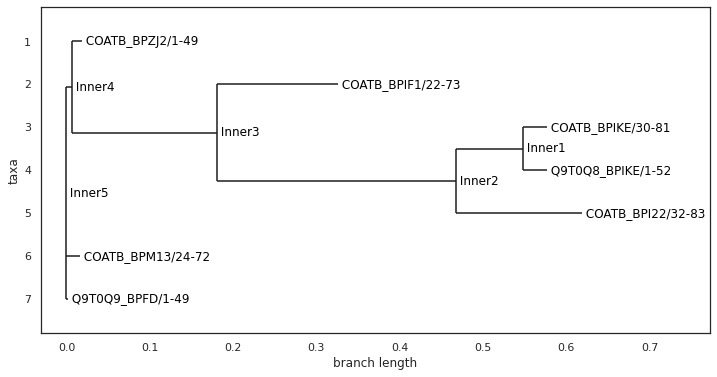

In [57]:
# Plot Tree 
fig,axes = plt.subplots(1,1,figsize=(12,6))
treep = Phylogeny.from_tree(tree)
Phylo.draw(treep,axes=axes)

### APPROACH 2 - PARSIMONY BASED APPROACH

In [58]:
''' Create a starting tree '''

# sub_alin2 =  "/kaggle/working/sub_alin2.fasta"
sub_alin2 = AlignIO.read("/kaggle/working/sub_alin2.fasta", "fasta")

calculator = DistanceCalculator('identity') # create calculator
dist_mat = calculator.get_distance(sub_alin2) # get the distance matrix of a given alignment object
constructor = DistanceTreeConstructor(calculator,'nj') # initialise
tree_0 = constructor.build_tree(sub_alin2) # main algorithm

In [59]:
# Recall Alignment
print(alin2,'\n')

Alignment with 7 rows and 52 columns
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRL...SKA COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKL...SRA Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73 



In [60]:
from Bio.Phylo.TreeConstruction import ParsimonyScorer, NNITreeSearcher,ParsimonyTreeConstructor

scorer = ParsimonyScorer()
searcher = NNITreeSearcher(scorer)
constructor = ParsimonyTreeConstructor(searcher,tree_0)
pars_tree = constructor.build_tree(alin2)
print(pars_tree)

Tree(rooted=True)
    Clade(branch_length=0)
        Clade(branch_length=0.1672676282051282, name='Inner2')
            Clade(branch_length=0.15024038461538464, name='COATB_BPI22/32-83')
            Clade(branch_length=0.08052884615384609, name='Inner1')
                Clade(branch_length=0.028846153846153855, name='Q9T0Q8_BPIKE/1-52')
                Clade(branch_length=0.028846153846153855, name='COATB_BPIKE/30-81')
        Clade(branch_length=0.1203926282051282, name='Inner3')
            Clade(branch_length=0.17307692307692302, name='Inner4')
                Clade(branch_length=0.007211538461538464, name='Inner5')
                    Clade(branch_length=0.002403846153846173, name='Q9T0Q9_BPFD/1-49')
                    Clade(branch_length=0.0168269230769231, name='COATB_BPM13/24-72')
                Clade(branch_length=0.012019230769230754, name='COATB_BPZJ2/1-49')
            Clade(branch_length=0.14503205128205127, name='COATB_BPIF1/22-73')


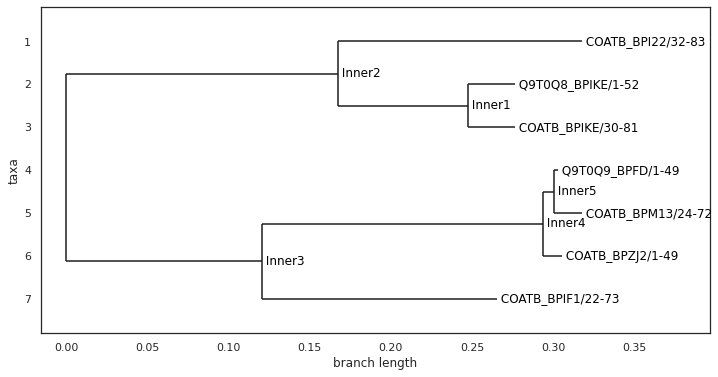

In [61]:
# Plot Tree 
fig,axes = plt.subplots(1,1,figsize=(12,6))
treep = Phylogeny.from_tree(pars_tree)
Phylo.draw(treep,axes=axes)

## Tree Visualisation

In [62]:
simple = open("/kaggle/working/example.dnd", "w")
simple.write('(((A,B),(C,D),(E,F,G)));')
simple.close()

tree = Phylo.read('/kaggle/working/example.dnd','newick')
print(tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade()
            Clade()
                Clade(name='A')
                Clade(name='B')
            Clade()
                Clade(name='C')
                Clade(name='D')
            Clade()
                Clade(name='E')
                Clade(name='F')
                Clade(name='G')


In [63]:
Phylo.draw_ascii(tree)

                                                    ________________________ A
                           ________________________|
                          |                        |________________________ B
                          |
                          |                         ________________________ C
_ ________________________|________________________|
                          |                        |________________________ D
                          |
                          |                         ________________________ E
                          |                        |
                          |________________________|________________________ F
                                                   |
                                                   |________________________ G



In [64]:
Phylo.convert('/kaggle/working/example.dnd','newick',
              '/kaggle/working/tree.xml','phyloxml')
trees = Phylo.parse('/kaggle/working/tree.xml','phyloxml')
for t in trees:
    print(t)

Phylogeny(rooted=False)
    Clade()
        Clade()
            Clade()
                Clade(name='A')
                Clade(name='B')
            Clade()
                Clade(name='C')
                Clade(name='D')
            Clade()
                Clade(name='E')
                Clade(name='F')
                Clade(name='G')


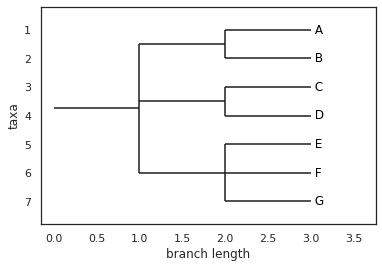

In [65]:
treep = Phylogeny.from_tree(tree)
Phylo.draw(treep)

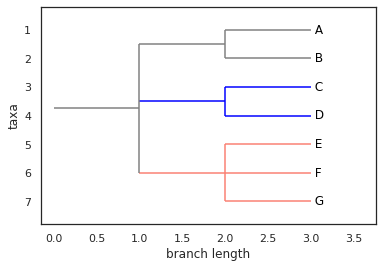

In [66]:
treep.root.color = 'gray'
mrca = treep.common_ancestor({'name':'E'},{'name':'F'})
mrca.color = 'salmon'
treep.clade[0,1].color = 'blue'
Phylo.draw(treep)

In [67]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from re import finditer,sub,search
import os, math, random
from colorama import Back, Style, Fore

# For blastwww

from Bio import SeqIO, SearchIO
from Bio.Blast import NCBIWWW 
from Bio.Seq import Seq
import pandas as pd
import panel as pn
import panel.widgets as pnw
pn.extension()
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Plot, Grid, Range1d
from bokeh.models.glyphs import Text, Rect
from bokeh.layouts import gridplot
from bokeh.transform import dodge
import bokeh

''' Display List '''

def lstcol(obj, cols=4, columnwise=True, gap=4):
    sobj = [str(item) for item in obj]
    if cols > len(sobj): cols = len(sobj)
    max_len = max([len(item) for item in sobj])
    if columnwise: cols = int(math.ceil(float(len(sobj)) / float(cols)))
    plist = [sobj[i: i+cols] for i in range(0, len(sobj), cols)]
    if columnwise:
        if not len(plist[-1]) == cols:
            plist[-1].extend(['']*(len(sobj) - len(plist[-1])))
        plist = zip(*plist)
    printer ='\n'.join([
        ''.join([c.ljust(max_len + gap) for c in p])
        for p in plist])
    print (printer)

In [68]:
from IPython.core.display import display, HTML, Javascript

color_map = ['#FFFFFF','#FF5733']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = '''
div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s;
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s;
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s;
    border-top: 2px solid %s;
}

div.input_prompt {
color: %s;
}

div.output_prompt {
color: %s; 
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s;
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s;
}

.edit_mode div.cell.selected:before {
background: %s;
}

.edit_mode div.cell.selected {
border-color: %s;

}
'''

def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, 
                                            main_color,  main_color, prompt, main_color, main_color, 
                                            main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

whl is the format of packages used on pip & these files can be uploaded to datasets, installed via pip 

In [69]:
'''

#####################################################

# General SQ Methods

# info - show sequence information
# view - visualise the sequence
# validate - check if the sequence contains no errors
# reverse_comp - reverse complement strand of DNA 
# add_annotation - add annotation to sequence

#####################################################

'''

class SQ(): 
    
    # Constructor
    def __init__ (self, seq=None,           # Sequence String
                        seq_type = "dna",   # Sequence Type 
                        id=None,            # Sequence Identifier
                        name=None,          # Sequene Name
                        description=None):  # Sequence Description
        
        # Core SQ 
        self.seq = seq.upper()
        self.seq_type = seq_type
        
        # If more detail is provided
        self.id = id  # sequence identifier (eg. database id)
        self.name = name   # name of sequence (eg. polyprotein)
        self.description = description # give the sequence some description
        self.annotations = {} # Annotate some parts of the seqence
        
        # if some fields are not filled
        if(self.id is None):
            self.id = f'sequence_{random.randint(1,1000)}'
        if(self.description is None):
            self.description = 'description not given'
        if(self.name is None):
            self.name = 'name not given'
        
        # Instantiate 
        self.decode = Decode(self.seq,self.seq_type) 
        self.count = Count(self.seq,self.seq_type,self.id)
        self.cut = Cut(self.seq,self.seq_type)
        self.pattern = Pattern(self.seq,self.seq_type)
    
    # class instance operations
    def __len__(self):
        return len(self.seq)
    def __getitem__(self, n):
        return self.seq[n]
    def __getslice__(self, i, j):
        return self.seq[i:j]
    def __str__(self):
        return self.seq
    def __add__(self,other):
        if(self.seq_type == other.seq_type):
            return SQ(self.seq + other.seq,seq_type=self.seq_type)
        else:
            print('sequences must of be same type')
            
    @staticmethod
    def colored(lseq):
        
        bcolors = {'A': '\033[92m','C': '\033[94m','G':'\033[93m',
            'T': '\033[91m','U': '\033[91m','reset': '\033[0;0m'}
        tmpStr = ""
        for nuc in lseq:
            if nuc in bcolors:
                tmpStr += bcolors[nuc] + nuc
            else:
                tmpStr += bcolors['reset'] + nuc
        return tmpStr + '\033[0;0m'
    
    @staticmethod
    def split_nucleotide_seq(genome,cut_id):
        genes = []
        for ix, char in enumerate(genome):
            if ix != 0 and ix%cut_id == 0:
                genes.append(' ')
            genes.append(char)
        return ''.join(genes)
    
    def seq_repr(self,genome_str, strand ='dna',split_id=10):
        
        nu_clr_switcher = {
            # standard color-codes
            'A': Back.GREEN,
            'a': Back.GREEN,
            'C': Back.YELLOW,
            'c': Back.YELLOW,
            'G': Back.RED,
            'g': Back.RED,
            'T': Back.BLUE,
            't': Back.BLUE,
            ' ': Style.RESET_ALL
        }
        
        if strand == 'dna':
            genome_str = self.split_nucleotide_seq(genome=genome_str,
                                                   cut_id=split_id)
            line_break_cntr = 0
            for i in range(len(genome_str)):
                if genome_str[i] == ' ':
                    line_break_cntr += 1
                    if line_break_cntr>0 and line_break_cntr%6==0:
                        text = "\n"
                    else:
                        text = nu_clr_switcher[genome_str[i]] + genome_str[i]
                else:
                    text = nu_clr_switcher[genome_str[i]] + genome_str[i]
                print(text, end="")
            Style.RESET_ALL
    
    def info(self):
        if(self.seq_type is 'dna' or self.seq_type is 'rna'):
            print (f"SEQ: {self.colored(self.seq)}" + \
                   " "+ f"TYPE: {self.seq_type}")
        else:
            print (f"SEQ: {self.seq}" +" " + \
                   f"TYPE: {self.seq_type}")
    
    # Visualise the nucleotide sequence
            
    def view(self,split_id=10):
        self.seq_repr(self.seq,self.seq_type,split_id)
        
    # Check Validity
    def validate(self,verbose=False):
        alp = self.count.abc()
        res = True; i = 0
        while (res and i < len(self.seq)):
            if self.seq[i] not in alp: 
                res = False
            else: i += 1
        if(res):
            if(verbose):
                print(f'{self.seq_type} is valid')
            return res
        else:
            if(verbose):
                print(f'{self.seq_type} is invalid')
            return res
        
    # Reverse Complement
    def reverse_comp(self):
        
        if (self.seq_type != "dna"): 
            print('input not DNA')
            return None
        
        lst_seq = ['A','T','G','C']
        lst_comp = ['T','A','C','G']
        
        comp = ''
        for char in self.seq:
            ii=-1
            for c in lst_seq:
                ii+=1
                if(char == c ):
                    comp = lst_comp[ii] + comp
                    
        return SQ(comp,"dna")
    
    #####################################################
            
    # Annotating Sequence, Notes
    # add_annotation - add_annotation
            
    #####################################################
    
    # method to add annotation to the current detailed sequence
    def add_annotation(self,inSQ):
        lseq = inSQ 
        lid = inSQ.id
        ldesc = inSQ.description
        idx = self.pattern.find(pattern=str(lseq),
                                   find_id='all',                                            
                                   search_id='standard',
                                   verbose=False)
        for i in idx:
            ln = len(lseq)
            self.annotations[f'sq_{i}:{i+ln}'] = f"{lid}_{ldesc}"
'''

########################################################

Cutting the Sequence
cut_pattern - cut sequence based on particular pattern
dnaseq_features - cut the sequence 

########################################################

'''

class Cut:
    
    # Constructor
    def __init__(self,seq,seq_type):
        self.seq = seq
        self.seq_type = seq_type
            
    # converts IUB ambiguity code into RE
    # returns cut position of a restriction enzyme 
    # (in IUB code) in a sequence
            
    @staticmethod
    def divide_loc(enzyme, sequence):
        
        def iubrex(IUB):   
            
            # main 4 bases
            # purine, pyrimidine, amino
            # keto, strong, weak
            # not A, not C, not G, not T
            #  not T, any 
            
            dic = {"A":"A", "C":"C", "G":"G", "T":"T", 
                    # Additional Cases
                    "R":"[GA]", "Y":"[CT]", "M":"[AC]", 
                    "K":"[GT]", "S":"[GC]", "W": "[AT]",
                    "B":"[CGT]", "D":"[AGT]", "H":"[ACT]",
                    "V":"[ACG]", "N":"[ACGT]"}
            
            site = IUB.replace("|","")
            rex = ""
            
            for c in site:
                rex += dic[c]
            return rex
        
        regexp = iubrex(enzyme) # convert pattern to IUB format
        matches = finditer(regexp, sequence)
        locs = []
        for match in matches:
            locs.append(match.start() + enzyme.find("|"))
            
        return locs # indicies of cuts
    
    # determines subsequences resulting from a sequence 
    # cut in a list of positions
    def cut_pattern(self,cut_pattern=None):
        
        if(cut_pattern is not None):
        
            res = []
            positions = self.divide_loc(cut_pattern,self.seq)
            positions.insert(0,0)
            positions.append(len(self.seq))
            for i in range(len(positions)-1):
                res.append(self.seq[positions[i]:positions[i+1]])
            return res
        
        else:
            print('[note] enter cut_pattern')
    
    # Function for when you want to prepare DNA sequence 
    # feature for ML applications
    def dnaseq_features(self,start=0,n_segs=101,seq_name=None):
        
        print(f'[note] cutting @{start} w/ {n_segs} segments')
        
        print(f"Input Sequence Length: {len(self.seq)}")
        remaind = len(self.seq)%n_segs
        if(remaind is not 0):
            last_id = len(self.seq) - remaind
        print(f"# Bases cut-off: {int(remaind)}")
        
        upd_seq = self.seq[start:last_id]
        
        print(f"Updated sequence length: {len(upd_seq)}")
        print(f"# Segments: {int(len(upd_seq)/n_segs)} created")
        if(seq_name is None):
            seq_name = 'seq'
            
        # store sequence subsets in a dictionary
        dic_seq = {}
        for i in range(0,3):
            a = int(i*n_segs) ; b = int(i*n_segs)+n_segs 
            identifier = f"{seq_name}_{a}:{b}"
            dic_seq[identifier] = upd_seq[a:b]
            
        lst_seq = dic_seq.values()
        index = list(dic_seq.keys())
        
        # One hot encode
        
        ii=-1
        for data in lst_seq:
            
            ii+=1; abc = 'acgt'.upper()
            
            char_to_int = dict((c, i) for i, c in enumerate(abc))
            int_enc = [char_to_int[char] for char in data]
            
            ohe = []
            for value in int_enc:
                base = [0 for _ in range(len(abc))]
                base[value] = 1
                ohe.append(base)
            np_mat = np.array(ohe)
            np_mat = np.expand_dims(np_mat,axis=0)
            
            if(ii is not 0):
                matrix = np.concatenate([np_mat,matrix],axis=0)
            else:
                matrix = np_mat
                
        return matrix,index
'''
#######################################################

# Attributes:
- seq - sequence in string format (passed from SQ)
- seq_type - sequence type (passed from SQ)

# Methods:
- transcription() - Change DNA to RNA
- protein(mins=0) - Decode all amino acid chains for 
                    all 6 reading frames

# Decoding of instructions for making proteins from DNA
# transcription (DNA -> RNA)
# get_protein (RNA -> AA chains containing proteins)

#######################################################
'''

class Decode(SQ):
    
    # constructor
    def __init__(self,seq,seq_type):
        self.seq = seq
        self.seq_type = seq_type
        
    @staticmethod
    def dictmap(tid=None):

        tc = {
            "GCT":"A", "GCC":"A", "GCA":"A","GCG":"A",
            "TGT":"C", "TGC":"C","GAT":"D","GAC":"D",   
            "GAA":"E", "GAG":"E","TTT":"F","TTC":"F",   
            "GGT":"G", "GGC":"G","GGA":"G","GGG":"G",
            "CAT":"H", "CAC":"H","ATA":"I","ATT":"I", "ATC":"I",  
            "AAA":"K", "AAG":"K","TTA":"L","TTG":"L", "CTT":"L",  
            "CTC":"L", "CTA":"L","CTG":"L",
            "ATG":"M", # starting codon
            "AAT":"N", "AAC":"N","CCT":"P","CCC":"P", "CCA":"P", "CCG":"P",
            "CAA":"Q", "CAG":"Q","CGT":"R","CGC":"R", "CGA":"R",
            "CGG":"R", "AGA":"R","AGG":"R","TCT":"S", "TCC":"S", "TCA":"S",
            "TCG":"S", "AGT":"S","AGC":"S","ACT":"T", "ACC":"T", "ACA":"T", 
            "ACG":"T","GTT":"V", "GTC":"V","GTA":"V","GTG":"V","TGG":"W",
            "TAT":"Y", "TAC":"Y",
            "TAA":"_","TAG":"_","TGA":"_" # ending codon
            }

        if tid in tc: 
          return tc[tid]
        else: 
          return None
        
    ''' DNA Transcription '''
    # Convert DNA -> RNA chain
    
    def transcription(self):
        if (self.seq_type == "dna"):
            return SQ(self.seq.replace("T","U"), "rna")
        else:
            print('[note] seq_type != dna')
            return None
        
    # Translate sequence
    def trans(self,seq,p0=0):
        seq_aa = ""
        for pos in range(p0,len(seq)-2,3):
            cod = seq[pos:pos+3]
            seq_aa += self.dictmap(tid=cod)
        return seq_aa
    
    '''Get All Possible open reading frames (ORF)'''
    # store all possible collections of aa
    # groups in all 6 frames
    
    def frames(self):
        res = []
        for i in range(0,3):
            res.append(self.trans(self.seq,i))
        rc = self.reverse_comp()
        for i in range(0,3):
            res.append(self.trans(rc,i)) 
        return res
    
    ''' Computes all possible proteins in an aa sequence in RF '''
    # using the knowledge that it starts with M and ends with _, 
    # filter out rule breaking ORFs
    # aa_seq -> full converted amino acid sequence
    
    @staticmethod
    def all_rf(aa_seq):
        
        current_prot = []; proteins = []
        for aa in aa_seq:
            if(aa == "_"): # stopping gap
                if(current_prot):
                    for p in current_prot:
                        proteins.append(p)
                    current_prot = []
            else: # not stopping gap
                if(aa == "M"):      # starting amino acid            
                    current_prot.append("")
                for i in range(len(current_prot)):
                    current_prot[i] += aa
                    
        return proteins
    
    ''' Computes all possible putative proteins for all ORF '''
    # and sort them based on size
    
    def protein(self,mins=0):
        
        # order 
        def insert_prot_ord(prot, lst_prot):
            i = 0
            while(i < len(lst_prot) and len(prot)<len(lst_prot[i])):
                i += 1
            lst_prot.insert(i, prot)
            
        # get all ORF conversions
        rfs = self.frames();res = []
        for rf in rfs:
            # return only protein cases
            prots = self.all_rf(rf) 
            # additionally sort based on protein size
            for p in prots: 
                if(len(p) > mins): 
                    insert_prot_ord(p,res)
        return res
'''

#####################################################

# Counting
# freq - count bases in sequence
# count_purines - count purines & pyrimidines
# groupfreq - count grouped bases

#####################################################

'''

class Count:
    
    def __init__(self,seq,seq_type,id):
        self.seq = seq
        self.seq_type = seq_type
        self.id = id
        
    @staticmethod
    def dict_sum(dictlist):
        outdic = {}
        for d in dictlist:
            for k in d.keys():
                outdic[k] = 0
        for d in dictlist:
            for k in d.keys():
                outdic[k]+=d[k]
        return outdic
        
    # Get ABC
    def abc(self):
        if(self.seq_type=="dna"): 
          return "ACGT"
        elif(self.seq_type=="rna"):
          return "ACGU"
        elif (self.seq_type=="aa"): 
          return "ACDEFGHIKLMNPQRSTVWY"
        else: 
          return None
    
    # Mapping Dictionary
    @staticmethod
    def dictmap(map_id='iupac_amino',tid=None):

        # IUPAC Amino Acids
        if(map_id is 'iupac_amino'):
            tc   = {'A':'Alanine','C':'Cysteine','D':'Aspartic Acid',
                    'E':'Glutamic Acid','F':'Phenylalanine','G':'Glycine',
                    'H':'Histidine','I':'Isoleucine','L':'Lysine',
                    'M':'Methionine','N':'Asparagine','P':'Proline',
                    'Q':'Glutamine','R':'Arginine','S':'Serine',
                    'T':'Threonine','V':'Valine','W':'Tryptophan',
                    'Y':'Tryosine','_':'Gap'}

        # IUPAC nuceotides
        elif(map_id is 'iupac_nucleotide'):
            tc  = {'A':'Adenine','C':'Cytosine','G':'Guanine','T':'Thymine',
                   'U':'Uracil'}

        if tid in tc: 
          return tc[tid]
        else: 
          return None
        
    ''' Frequency of Alphabet '''
    # nucleotide or amino acid sequences
    
    def freq(self,compare:list=None,       # list of comparing sequences
                  show_id:str='perc',     # perc/count
                  fsize:list=[None,None],  # figure size
                  title:str=None,
                  barmode:str='group'): 
        
        c1 = dict(Counter(self.seq))  # abc counter for s1
        abc = list(self.abc())
        count = Counter(abc)
        abc_c = dict(Counter({x:0 for x in count}))
        c_all1 = self.dict_sum([c1,abc_c])
            
        lst = []
        for i in c_all1.keys():
           if(self.seq_type == 'dna' or self.seq_type == 'rna'):
               lst.append(self.dictmap('iupac_nucleotide',i))
           elif(self.seq_type == 'aa'):
               lst.append(self.dictmap('iupac_amino',i))
                    
        perc = [round(x/len(self.seq),3)*100 for x in [*c_all1.values()]]
        if(show_id is 'perc'):
            show1 = lst; show2 = perc;
            xaxis_id = 'Character (%)'
        elif(show_id is 'count'):
            show1 = lst; show2 = [*c_all1.values()]
            xaxis_id = 'Count'
            
        if(self.id is not None):
            lname = self.id
        else:
            lname = 'main seq'
            
        fig = go.Figure(go.Bar(y=show1,x=show2,
                               orientation='h',name=lname))
        
        # Compare other sequences
        if(compare is not None):
            
            # Cycle through all SQ in list
            
            for ii,lseq in enumerate(compare):
                
                ii+=1;
                c2 = dict(Counter(lseq.seq))  # abc counter for s2
                c_all2 = self.dict_sum([c2,abc_c])    
            
                lst2 = []
                for i in c_all2.keys():
                   if(self.seq_type == 'dna' or self.seq_type == 'rna'):
                       lst2.append(self.dictmap('iupac_nucleotide',i))
                   elif(self.seq_type == 'aa'):
                       lst2.append(self.dictmap('iupac_amino',i))
                
                perc = [round(x/len(lseq.seq),3)*100 for x in [*c_all2.values()]]
                if(show_id is 'perc'):
                    show1 = lst2;show2 = perc
                elif(show_id is 'count'):
                    show1 = lst2; show2 = [*c_all2.values()]
                
                if(lseq.id is not None):
                    lname = lseq.id
                else:
                    lname = f'seq{ii}'
                    
                fig.add_trace(go.Bar(y=show1,x=show2,
                                     orientation='h',
                                     name=lname))
                
        # Set title
        
        if(title is None):
            title = f'{self.seq_type} sequence content'
        else:
            title = title
            
        fig.update_layout(template='plotly_white',
                          barmode=barmode, # stack,group,overlay,relative
                          height=fsize[0],width=fsize[1],
                          bargroupgap=0.2, 
                          font=dict(size=11),title=title)
        fig.update_traces(width=0.25,
#                           marker_color='rgb(158,202,225)', 
                          marker_line_color='#212121',
                          marker_line_width=1.0, opacity=0.6)
        fig.update_xaxes(nticks=20,title_text=xaxis_id);fig.show()
        
    # Count frequency of grouped nucleotides
    
    def gfreq(self,compare:list=None,
                   count_id='di',
                   fsize=[None,None],
                   barmode='group',
                   xlim=20):
        
        if(count_id is 'di'):
            lst_count_id = ['AA','AC','AG','AT',
                            'CA','CC','CG','CT',
                            'GA','GC','GG','GT',
                            'TA','TC','TG','TT']
            
        elif(count_id is 'tri'):
            lst_count_id = ['AAA','AAC','AAG','AAT','ACA','ACC','ACG',
                            'ACT','AGA','AGC','AGG','AGT','ATA','ATC',
                            'ATG','ATT','CAA','CAC','CAG','CAT','CCA',
                            'CCC','CCG','CCT','CGA','CGC','CGG','CGT',
                            'CTA','CTC','CTG','CTT','GAA','GAC','GAG',
                            'GAT','GCA','GCC','GCG','GCT','GGA','GGC',
                            'GGG','GGT','GTA','GTC','GTG','GTT','TAA',
                            'TAC','TAG','TAT','TCA','TCC','TCG','TCT',
                            'TGA','TGC','TGG','TGT','TTA','TTC','TTG',
                            'TTT']
            
        if(self.seq_type is 'dna'):
            
            lst_c = []
            for i in lst_count_id:
                lst_c.append(self.seq.count(i))
                
            df = pd.DataFrame(data=lst_c,
                              index=lst_count_id).T
            df.index = [self.id]
            
            if(compare is not None):
                
                ii=-1
                for seq in compare: # cycle through all SQ
                
                    ii+=1;lst_c = []
                    for jj in lst_count_id:
                        lst_c.append(compare[ii].seq.count(jj))
                        
                    ldf = pd.DataFrame(data=lst_c,
                                       index=lst_count_id).T
                    ldf.index = [seq.id]
                    df = pd.concat([df,ldf],axis=0)
            
            if(count_id is 'tri'):
                xaxis=dict(rangeslider=dict(visible=True))
            else:
                xaxis = None
                
            # Plot
            fig = px.bar(df.T,
                         x=df.T.index,
                         y=df.T.columns)
            fig.update_layout(template='plotly_white',
                              barmode=barmode,
                              title=f'{count_id} nucleotide | count',
                              font={'size':11},
#                               margin=dict(l=20, r=20, t=80, b=20),
                              xaxis=xaxis,
                              height=fsize[0],width=fsize[1]); 
            fig.update_traces(width=0.25,
    #                           marker_color='rgb(158,202,225)', 
                              marker_line_color='#212121',
                              marker_line_width=1.0, opacity=0.6)
            
            if(count_id is 'tri'):
                fig['layout']['xaxis'].update(title='', 
                                              range=[-1,xlim], 
                                              autorange=False) # range slider
            
            fig.show()
        else:
            print('[note] input must be dna type')
            
    # Return purines & pyrimidines (%)
    def purines(self):
        
        if (self.seq_type == "dna" or self.seq_type == "rna"):        
        
            dic_count = {}
            purines1 = self.seq.count("A") + self.seq.count("G")
            pyrimidines1 = self.seq.count("C") + self.seq.count("T")
            purines1 = purines1/len(self.seq)
            pyrimidines1 = pyrimidines1/len(self.seq)
            dic_count['purines'] = round(purines1,4)
            dic_count['pyrimidine'] = round(pyrimidines1,4)
            return dic_count
    
    # Return GC nucleotide (%)
    def gc(self):
        
        if (self.seq_type == "dna" or self.seq_type == "rna"):
            ii = 0
            for s in self.seq:
                if(s in "GC"):
                    ii += 1

            val = round(ii/len(self.seq),4)
            return val
''' 

#####################################################
    
# Finding Patterns in Sequence
# find - find index(ies) of particular pattern 
    
#####################################################

'''

class Pattern:
    
    def __init__(self,seq,seq_type):
        self.seq = seq
        self.seq_type = seq_type
    
    # Prosite Pattern Lines
    # - Standard IUPAC amino acid used to as bases in pattern, separated by -
    # - x -> any amino acid acceptable
    # - [] -> ambiguity represented by list, any aa in that list acceptable
    # - {} -> ambiguity represented by list, any aa other than in {} accepted
    # - repetition of pattern element shown below:
    #   x(3) -> x-x-x, x(2,4) -> to x-x or x-x-x or x-x-x-x
    
    @staticmethod
    def prosite_process(rex):
        # adjust prosite to RE format
        rex = rex.replace("(","{")
        rex = rex.replace(")","}")
        rex = rex.replace("x",".")
        rex = rex.replace("-","")
        return rex
    
    ''' Find Substring Pattern in Sequence '''
    
    def find(self,pattern,          # subsequence pattern
                  find_id='first',  # first,all,overlap
                  search_id=None,   # search pattern option (prosite)
                  verbose=True):    # Verbal Output
        
        ''' [1] Find First Match Only '''
        
        if(find_id is 'first'):
            
            if(search_id is 'prosite'):
                pattern = self.prosite_process(pattern)
                
            # General search as well
            re_search = search(pattern,self.seq)
            if (re_search != None):
                if(verbose):
                    print(f"showing first for {pattern}")
                result = re_search.span()[0]
                return result
            else:
                if(verbose):
                    print(f'no matches for {pattern} found')
                
        elif(find_id == 'all'):
            
            if(search_id is 'prosite'):
                pattern = self.prosite_process(pattern)
                
            re_search = finditer(pattern,self.seq)
            result = []
            for x in re_search:
                result.append(x.span()[0])
                
            if(len(result) is not 0):
                if(verbose):
                    print(f"found {len(result)} matches")
                return result
            else:
                if(verbose):
                    print(f'no matches for {pattern} found')
                
        elif(find_id == 'overlap'):
            
            if(search_id is 'prosite'):
                pattern = self.prosite_process(pattern)
            mos = finditer("(?="+pattern+")",self.seq)
            result = []
            for x in mos:
                result.append(x.span()[0])
                
            if(len(result) is not 0):
                if(verbose):
                    print(f"found {len(result)} matches")
                return result
            else:
                if(verbose):
                    print(f'no matches for {pattern} found')
        else:
            print('first,all,overlap options')

In [70]:
# Define sequences in string format
seqn = 'ATGACGGATCAGCCGCAAGCGGAATTGGCGTTTACGTACGATGCGCCGTAA'
seqaa = 'MMMELQHQRLMALAGQLQLESLISAAPALSQQAVDQEWSYMDFLEHLLHDFTF'

# Define Two DNA sequences (instances)
sq_n = SQ(seqn,'dna')
# define new protein sequence 
sq_aa = SQ(seqaa,'aa')

# Show class variables
sq_n.info()
sq_aa.info()

SEQ: ATGACGGATCAGCCGCAAGCGGAATTGGCGTTTACGTACGATGCGCCGTAA TYPE: dna
SEQ: MMMELQHQRLMALAGQLQLESLISAAPALSQQAVDQEWSYMDFLEHLLHDFTF TYPE: aa


In [71]:
rev_comp = sq_n.reverse_comp()
rev_comp.info()

SEQ: TTACGGCGCATCGTACGTAAACGCCAATTCCGCTTGCGGCTGATCCGTCAT TYPE: dna


In [72]:
# Defining some extra detail
seq_det = SQ(seq='ACTTTTGACCTCAA',     # sequence
            id='sequence',             # give the sequence some identifier 
            description='mysequence')  # write a short description about the sequence

# When required, we can call the SQ object by using .seq
print(f'Extracting SQ when needed: {seq_det.seq}')

print(f'Sequence ID: {seq_det.id}') # used for alignment naming etc
print(f'Sequence Annotations for subsequence labeling: {seq_det.annotations}')
print(f'A note describing the sequence: {seq_det.description}')

Extracting SQ when needed: ACTTTTGACCTCAA
Sequence ID: sequence
Sequence Annotations for subsequence labeling: {}
A note describing the sequence: mysequence


In [73]:
subsequence1 = SQ('TTTT',id='db|1',description='subseq') 
subsequence2 = SQ('CCTCA',id='db|2',description='subseq')
seq_det.add_annotation(subsequence1)
seq_det.add_annotation(subsequence2)
seq_det.annotations

{'sq_2:6': 'db|1_subseq', 'sq_8:13': 'db|2_subseq'}

In [74]:
# compare content percentage (default)

sq_n_compare = SQ('ACTCCCTGAGGATCATGC',id='sequence A') # sequence with identifier shows up in graph
sq_n_compare2 = SQ('ACATACATAACACATCC')                 # sequences w/o id are set to default names

# Compare the nucleotide % of three sequences

sq_n.count.freq(compare=[sq_n_compare,sq_n_compare2], # list of sequences
                fsize=[400,800],
                show_id='count',
                title='Comparing Nucleotide Content (%)')

In [75]:
# show the amino acid content of the protein

sq_aa.count.freq(show_id='perc', 
                 fsize=[500,800])

In [76]:
# Define Two DNA sequences (instances)
sq_1 = SQ('ATGACGGATCAGCCGCAAGCGGAATTGGCGCACATTTACGTACGATGCGCCGTAA','dna',id='seq1')
sq_2 = SQ('ATGACGGATCAGCCGCAAGCGGAATTGGCGTTTACGTACGAAGAGACACCCGTAA','dna',id='seq2')
sq_3 = SQ('ATTTAATCATTGCCGTTATCGGAATTGGCGTTTACGTACGAAGAGACACCCGTAA','dna',id='seq3')

# Compare Trinucleotides of two sequences
sq_1.count.gfreq(compare=[sq_2,sq_3],
                 count_id='tri',
                 barmode = 'group', # group,stack
                 fsize=[300,800])

In [77]:
## Compare Dinucleotides of two sequences
sq_n.count.gfreq(compare=[sq_1,sq_2,sq_3],
                   count_id='di',
                   barmode = 'stack', # group,stack
                   fsize=[400,800])


In [78]:
print('dict w/ percentages:')
sq_n.count.purines()

dict w/ percentages:


{'purines': 0.5686, 'pyrimidine': 0.4314}

In [79]:
''' Don't actually have to call (just for demonstration) '''

# Sequence with initial codon coinciding with start codon &
# end w/ end codon (ATG & TAA respectively)
seq = 'ATGACGGATCAGCCGCAAGCGGAATTGGCGTTTACGTACGATGCGCCGTAA'
strand = SQ(seq=seq,seq_type='dna')
print(f'Correct ORF: {strand.decode.trans(strand.seq,p0=0)}')

print(f'All ORF:')
lst_ORF = strand.decode.frames()
lstcol(lst_ORF)

Correct ORF: MTDQPQAELAFTYDAP_
All ORF:
MTDQPQAELAFTYDAP_    DGSAASGIGVYVRCAV     YGASYVNANSACG_SV     
_RISRKRNWRLRTMRR     LRRIVRKRQFRLRLIRH    TAHRT_TPIPLAADPS     


In [80]:
# Only one of the ORFs meets the requirement, so only one putative protein is found
proteins = strand.decode.protein()
print(proteins)
print(f'{len(proteins[0])} characters')

['MTDQPQAELAFTYDAP']
16 characters


In [81]:
# NCBI identifiers
identifiers_dic = {'lcl':'local(nodb)','bbs':'GenInfo backbone seqid',
                   'bbm':'GenInfo backbone moltype','gim':'GenInfo import ID',
                   'gb':'GenBank','emb':'EMBL','pir':'PIR','sp':'SWISS-PROT',
                   'pat':'patent','pgp':'pre-grant patent','ref':'RefSeq',
                   'gnl':'general database reference','prf':'PRF','pdb':'PDB',
                   'gi':'GenInfo integrated database','dbj':'DDBJ'}

# FASTA formats
FASTA_dic = {'fa':'generic','fasta':'generic','fna':'nucleic acid',
             'ffn':'nucleotide of gene regions','faa':'amino acid',
             'frn':'non-coding RNA'}

# Class to read different files and store info only
class read_seq(SQ):
    
    def __init__(self,name):
        self.name = name
        self.format = name.rsplit('.',1)[1]    
        if(self.format in FASTA_dic):      # if one of the fasta formats
            self.read_FASTA(self.name)

    # read FASTA format
    def read_FASTA(self,filename):

        tseq = None; self.lst_seq = []     # list of sequences
        thead = None; self.lst_header = [] # list of sequence identifications
        ff = FASTA_dic[filename.rsplit('.',1)[1]]
        file = open(filename,'r')

        for line in file:
            if(search(">.*", line)): # get lines w/ >
                    if(tseq != None and thead != None and tseq != ""):
                        self.lst_seq.append(tseq)
                    thead = line; self.lst_header.append(line)              
                    tseq = ""
            else:
                if(tseq == None):
                    return None
                else: 
                    tseq += sub("\s","",line)

        if(tseq != None and thead != None and tseq != ""):
            self.lst_seq.append(tseq)
            
        print(f'READ -> FASTA [{ff}] | #SEQ: {len(self.lst_seq)}')
        file.close()
        
    # get read sequences
    def get_sq(self):
        lst_out = []
        
        # If there's more than one sequence
        if(len(self.lst_seq) > 1):
            for i in range(0,len(self.lst_seq)):
                lst_types = ['dna','rna','aa']
                for check in lst_types:
                    if(SQ(seq=self.lst_seq[i],seq_type=check).validate()):
                        lst_out.append(SQ(self.lst_seq[i],seq_type=check,
                                          description=self.lst_header[i]))
            return lst_out
        
        # return just the one file
        else:
            lst_types = ['dna','rna','aa']
            for check in lst_types:
                if(SQ(self.lst_seq[0],check).validate()): # if valid sq
                    return SQ(seq=self.lst_seq[0],seq_type=check,
                              description=self.lst_header[0])

In [82]:
# define pathway to FASTA file
file_faa = '/kaggle/input/bioinformatics/sequences/NC_005816.faa' # amino acid chain sequence
file_fna = '/kaggle/input/bioinformatics/sequences/NC_005816.fna' # nucleotide sequence 

# fetch sequence from file and store each in sequence class, SQ
col_seq_aa = read_seq(file_faa).get_sq()
col_seq_n = read_seq(file_fna).get_sq()

# sequence description
col_seq_aa[0].description

READ -> FASTA [amino acid] | #SEQ: 10
READ -> FASTA [nucleic acid] | #SEQ: 1


'>gi|45478712|ref|NP_995567.1| putative transposase [Yersinia pestis biovar Microtus str. 91001]\n'

In [83]:
# show sequence information; seq and type
col_seq_aa[1].info()

SEQ: MMMELQHQRLMALAGQLQLESLISAAPALSQQAVDQEWSYMDFLEHLLHEEKLARHQRKQAMYTRMAAFPAVKTFEEYDFTFATGAPQKQLQSLRSLSFIERNENIVLLGPSGVGKTHLAIAMGYEAVRAGIKVRFTTAADLLLQLSTAQRQGRYKTTLQRGVMAPRLLIIDEIGYLPFSQEEAKLFFQVIAKRYEKSAMILTSNLPFGQWDQTFAGDAALTSAMLDRILHHSHVVQIKGESYRLRQKRKAGVIAEANPE TYPE: aa


In [84]:
print(f'Number of Sequences stored: {len(col_seq_aa)}'); 
print(f'List of Sequences Type: {type(col_seq_aa)}')
print(f'List Content Type: {type(col_seq_aa[0])}')
print(f'Single Fetched Sequence Type: {type(col_seq_n)}') # seqrec objects

Number of Sequences stored: 10
List of Sequences Type: <class 'list'>
List Content Type: <class '__main__.SQ'>
Single Fetched Sequence Type: <class '__main__.SQ'>


In [85]:
# Select only a subset as the strand is a little too big (arbitrarily selected)
print('Create subsequence:\n')
subseq_string = col_seq_n.seq[100:500]
col_seq_subset = SQ(seq=subseq_string,
                    seq_type=col_seq_n.seq_type)
col_seq_subset.info()

print('\nDecode DNA: \n')
# get all proteins with a length of more than 1
proteins = col_seq_subset.decode.protein()

# # list all found proteins above a length of 2 
print('Proteins in Sequence col_seq_subset:')
lstcol(proteins,2)

Create subsequence:

SEQ: GACAGTTATGGAAATTAAAATCCTGCACAAGCAGGGAATGAGTAGCCGGGCGATTGCCAGAGAACTGGGGATCTCCCGCAATACCGTTAAACGTTATTTGCAGGCAAAATCTGAGCCGCCAAAATATACGCCGCGACCTGCTGTTGCTTCACTCCTGGATGAATACCGGGATTATATTCGTCAACGCATCGCCGATGCTCATCCTTACAAAATCCCGGCAACGGTAATCGCTCGCGAGATCAGAGACCAGGGATATCGTGGCGGAATGACCATTCTCAGGGCATTCATTCGTTCTCTCTCGGTTCCTCAGGAGCAGGAGCCTGCCGTTCGGTTCGAAACTGAACCCGGACGACAGATGCAGGTTGACTGGGGCACTATGCGTAATGGTCGCTCACCGCTT TYPE: dna

Decode DNA: 

Proteins in Sequence col_seq_subset:
MNALRMVIPPRYPWSLISRAITVAGIL    MLILTKSRQR                     
MVIPPRYPWSLISRAITVAGIL         MP                             
MNTGIIFVNASPMLILTKSRQR         MR                             
MSIGDALTNIIPVFIQE                                             


In [86]:
# read sequence from file
file_fasta = '/kaggle/input/bioinformatics/sequences/P38398.fasta'
aa_seq = read_seq(file_fasta).get_sq()

READ -> FASTA [generic] | #SEQ: 1


In [87]:
# sequence description
aa_seq.description

'>sp|P38398|BRCA1_HUMAN Breast cancer type 1 susceptibility protein OS=Homo sapiens OX=9606 GN=BRCA1 PE=1 SV=2\n'

In [88]:
# sequence string
aa_seq.seq

'MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKFCMLKLLNQKKGPSQCPLCKNDITKRSLQESTRFSQLVEELLKIICAFQLDTGLEYANSYNFAKKENNSPEHLKDEVSIIQSMGYRNRAKRLLQSEPENPSLQETSLSVQLSNLGTVRTLRTKQRIQPQKTSVYIELGSDSSEDTVNKATYCSVGDQELLQITPQGTRDEISLDSAKKAACEFSETDVTNTEHHQPSNNDLNTTEKRAAERHPEKYQGSSVSNLHVEPCGTNTHASSLQHENSSLLLTKDRMNVEKAEFCNKSKQPGLARSQHNRWAGSKETCNDRRTPSTEKKVDLNADPLCERKEWNKQKLPCSENPRDTEDVPWITLNSSIQKVNEWFSRSDELLGSDDSHDGESESNAKVADVLDVLNEVDEYSGSSEKIDLLASDPHEALICKSERVHSKSVESNIEDKIFGKTYRKKASLPNLSHVTENLIIGAFVTEPQIIQERPLTNKLKRKRRPTSGLHPEDFIKKADLAVQKTPEMINQGTNQTEQNGQVMNITNSGHENKTKGDSIQNEKNPNPIESLEKESAFKTKAEPISSSISNMELELNIHNSKAPKKNRLRRKSSTRHIHALELVVSRNLSPPNCTELQIDSCSSSEEIKKKKYNQMPVRHSRNLQLMEGKEPATGAKKSNKPNEQTSKRHDSDTFPELKLTNAPGSFTKCSNTSELKEFVNPSLPREEKEEKLETVKVSNNAEDPKDLMLSGERVLQTERSVESSSISLVPGTDYGTQESISLLEVSTLGKAKTEPNKCVSQCAAFENPKGLIHGCSKDNRNDTEGFKYPLGHEVNHSRETSIEMEESELDAQYLQNTFKVSKRQSFAPFSNPGNAEEECATFSAHSGSLKKQSPKVTFECEQKEENQGKNESNIKPVQTVNITAGFPVVGQKDKPVDNAKCSIKGGSRFCLSSQFRGNETGLITPNKHGLLQNPYRIPPLFPIKSFVKTKCKKNLL

In [89]:
# find_id -> 'first' (find the first match index)
# find id -> 'all' (find all non overlapping indicies)
# find_id -> 'overlap' (find all overlapping indicies)

aa_seq.pattern.find(pattern='C-x-H-x-[LIVMFY]-C-x(2)-C-[LIVMYA]',
                    find_id='first',                                            
                    search_id='prosite')

showing first for C.H.[LIVMFY]C.{2}C[LIVMYA]


38

In [90]:
# find all EES patterns
aa_seq.pattern.find(pattern='EES',
                    find_id='all',                                            
                    search_id='standard')

found 3 matches


[847, 1539, 1628]

In [91]:
# Arbitrary cut pattern at |
n_seq = SQ('AAGATTCGAGCATGCAAACCGGATACA',seq_type='dna')
n_seq.cut.cut_pattern('AGC|AT')

['AAGATTCGAGC', 'ATGCAAACCGGATACA']

In [92]:
# define sequence and create OHE features
seqn = SQ('ATGACGGATCAGCCGCAAGCGGAATTGGCGTTTACGTACGATGCGCCGTAA',seq_type='dna')
features, index = seqn.cut.dnaseq_features(0,10,'dna_features')
features

[note] cutting @0 w/ 10 segments
Input Sequence Length: 51
# Bases cut-off: 1
Updated sequence length: 50
# Segments: 5 created


array([[[0, 0, 1, 0],
        [0, 0, 1, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0]],

       [[1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0]],

       [[1, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 0]]])

In [93]:
# show index of cut segments
index

['dna_features_0:10', 'dna_features_10:20', 'dna_features_20:30']

In [94]:
# Class to access BioPython's blastwww & plot alignments 
class BLASTwww:
    
    # Constructor
    def __init__(self,seq=None,        # input sequence (Seq/string)
                      program='blastp', # BLAST program (blastn/blastp)
                      database='pdb',  # BLAST query database
                      verbose=False,   # write outputs
                      show_top=10,     # maximum number of hits
                      hit_id=0,        # show query match id #
                      read_xml=False,   # read XML BLAST query over new query
                      name=None):      # query identifier
        
        self.seq = seq 
        self.database = database
        self.verbose = verbose
        self.show_top = show_top
        self.hit_id = hit_id
        self.read_xml = read_xml # if present -> read xml
        self.name = name  # search identifier (used for save)
        self.program = program # blast search program
        self.query_df = None   # dataframe that stored query data
        
        # Colourcoding dictionary
        self.dict_cc = {'A':'#3386FF','C':'#3386FF','D':'#B842B2','E':'#B842B2',
                        'F':'#3386FF','G':'#FF5733','H':'#37ADBB','I':'#3386FF',
                        'L':'#3386FF','M':'#3386FF','N':'#24CE5D','P':'#E3E710',
                        'Q':'#24CE5D','R':'#D3385E','S':'#24CE5D','T':'#24CE5D',
                        'V':'#3386FF','W':'#3386FF','Y':'#37ADBB','_':'white',
                        'K':'#D3385E'}
        
    ''' Save BLAST search in CSV format '''
    # read xml & convert to pandas dataframe
    
    def save(self):
        
        # save search xml
        sf = open(f"/kaggle/working/blast_{self.name}.xml", "w")
        sf.write(self.__result_handle.read()) 
        self.__result_handle.close()
        sf.close() 

        # save metadata
        self.df.to_csv(f'/kaggle/working/csv_{self.name}.csv')
        
    ''' Search for aminoacid chain in database '''
    # Find amino acid sequence in NCBI databases
    # by default, program -> blastp (protein/aa chain search)
    # To prevent multiple fetches, read xml is active & reads xml if fetched
    # more than once
    
    def fetch(self):

        # Input in BioPython Sequence Format
        if(type(self.seq) is str):
            self.seq = Seq(self.seq)
        
        if(self.read_xml == True):
            self.__result_handle = open(f"/kaggle/working/blast_{self.name}.xml")
            blast_qresult = SearchIO.read(self.__result_handle,"blast-xml")
        else:
            self.__result_handle = NCBIWWW.qblast(self.program,
                                                  self.database,
                                                  self.seq)
            
            blast_qresult = SearchIO.read(self.__result_handle,"blast-xml")
            self.read_xml = True # blast query has been saved
 
        ii=-1
        lst_id = []; lst_descr = []; lst_bitscore = []
        lst_ali = []; lst_eval = []
        
        for f in blast_qresult: 
            ii+=1
            seqid = blast_qresult[ii]
            details = seqid[0]

            lst_id.append(seqid.id)
            lst_descr.append(seqid.description)
            lst_eval.append(details.evalue)
            lst_bitscore.append(details.bitscore)
            lst_ali.append(details.aln)

        dic_data = {'id':lst_id,'description':lst_descr,
                    'evalue':lst_eval,'bitscore':lst_bitscore,
                    'alignment':lst_ali}

        self.__query_df = pd.DataFrame(dic_data)

        if(self.verbose):

            print(blast_qresult[0:self.show_top])
            #fetch the id, description, evalue, bitscore & alignment
            print(f'\nShowing BLAST query result #{hit_id}')
            print('------------------------------------------------------------')
            seqid = blast_qresult[hit_id]
            details = seqid[hit_id]

            print(f'Sequence ID: {seqid.id}')
            print(f'Description: {seqid.description}')
            print(f'e-value: {details.evalue}')
            print(f'Bit Score: {details.bitscore}')

            print('\nShowing Alignment:')
            print('------------------------------------------------------------')
            print(f"Alignment:\n{details.aln}")
            
    def __get_colors(self,seqs):
        """make colors for bases in sequence"""
        text = [i for s in list(seqs) for i in s]
        colors = [self.dict_cc[i] for i in text]
        return colors
    
    ''' Visualise BLAST query '''
    # After fetch, view result dataframe
    
    def view_query(self):
        
        if(self.__query_df is not None):
            return self.__query_df
            
    ''' View Alignment '''
    # View BLAST alignment using Bokeh
    
    def view_alignment(self,aln_id,
                  fontsize="9pt",
                  plot_width=800):
        
        # Choose Alignment 
        if(self.__query_df is not None):
            aln_id = self.__query_df.loc[aln_id,'alignment']
            
        #make sequence and id lists from the aln object
        seqs = [rec.seq for rec in (aln_id)]
        ids = [rec.id for rec in aln_id]    
        text = [i for s in list(seqs) for i in s]
        colors = self.__get_colors(seqs)    
        N = len(seqs[0])
        S = len(seqs)    

        x = np.arange(0.5,N+0.5)
        y = np.arange(0,S,1)
        #creates a 2D grid of coords from the 1D arrays
        xx, yy = np.meshgrid(x, y)
        #flattens the arrays
        gx = xx.ravel()
        gy = yy.flatten()
        #use recty for rect coords with an offset
        recty = gy+0.5
        h= 1/S
        #now we can create the ColumnDataSource with all the arrays
        source = ColumnDataSource(dict(x=gx, y=gy, recty=recty, text=text, colors=colors))
        plot_height = len(seqs)*15+25
        x_range = Range1d(0,N+1, bounds='auto')
        if N>100:
            viewlen=50
        else:
            viewlen=N
        #view_range is for the close up view
        view_range = (0,viewlen)
        tools="xpan, xwheel_zoom, reset, save" 

        #entire sequence view (no text, with zoom)
        p = figure(title=None, plot_width= plot_width, plot_height=50,
                   x_range=x_range, y_range=(0,S), tools=tools,
                   min_border=0, toolbar_location='below')
        rects = Rect(x="x", y="recty",  width=1, height=1, fill_color="colors",
                     line_color=None, fill_alpha=0.6)
        p.add_glyph(source, rects)
        p.yaxis.visible = False
        p.grid.visible = False  

        #sequence text view with ability to scroll along x axis
        p1 = figure(title=None, plot_width=plot_width, plot_height=plot_height,
                    x_range=view_range, y_range=ids, tools="xpan,reset",
                    min_border=0, toolbar_location='below')#, lod_factor=1)          
        glyph = Text(x="x", y="y", text="text", text_align='center',text_color="black",
                    text_font_size=fontsize,text_font_style='bold')
        rects = Rect(x="x", y="recty",  width=1.0, height=1, fill_color="colors",
                    line_color=None, fill_alpha=0.4)
        p1.add_glyph(source, glyph)
        p1.add_glyph(source, rects)

        p1.grid.visible = False
        p1.xaxis.major_label_text_font_style = "bold"
        p1.yaxis.minor_tick_line_width = 0
        p1.yaxis.major_tick_line_width = 0
        
        return gridplot([[p],[p1]],toolbar_location='below') 

In [95]:
# Read FASTA format containing Covid Genome
virus_fna = '/kaggle/input/coronavirus-genome-sequence/MN908947.fna'
virus_n = read_seq(virus_fna) # read and store FNA data 
print(f'Sequence Header: {virus_n.lst_header[0]}')

READ -> FASTA [nucleic acid] | #SEQ: 1
Sequence Header: >MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome



In [96]:
# Store the sequence, defining a SQ class instance
virus_sq = virus_n.get_sq()
print(f'Sequence length: {len(virus_sq)} nucleotides')

# The sequence is a bit too long, lets show the first 1000 characters
virus_sq[0:500]

Sequence length: 29903 nucleotides


'ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTG'

We visualise the nucleotide frequency in the entire sequence & also check the GC content (% wise)

In [97]:
# The virus contains a heavy portion of Thymine & Adenine (63%)
virus_sq.count.freq(fsize=[300,800],
                    title='Nucleotide Content (%)')

print(f'GC-Content Sequence 1: {round(virus_sq.count.gc()*100,3)}%')

GC-Content Sequence 1: 37.97%


Using the get_protein method, we can obtain a list of amino acid chains by translating the sequence

In [98]:
# Get all amino acid chains above default = 1
lst_prot = virus_sq.decode.protein()
print(f'Total Number of Amino Acid Chains: {len(lst_prot)}')

Total Number of Amino Acid Chains: 1208


#### FUNCTIONAL PROTEINS & OLIGOPEPTIDES
Upon translation, our amino acid chains aren't actually all proteins, some extra criteria these chains must meet in order to be classified as proteins exist:
Functional proteins are chains above 20 amino acids.
Smaller chains are called oligopeptides (2-20 amino acids) & have other functionalities.
Let's select the largest amino acid chain found in the genome & search for it in a databse, so we can identify it.

In [99]:
# For convenience, let's select a subset above 50 amino acids
print(f'Amino Acid Chains: {len(virus_sq.decode.protein(mins=50))}')
largest_aa = virus_sq.decode.protein(mins=50)[0]
print(f'Largest Amino Acid: {largest_aa}')
print(f'Length of Largest Amino Acid: {len(virus_sq.decode.protein(mins=50)[0])}')

Amino Acid Chains: 243
Largest Amino Acid: MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGTCGLVEVEKGVLPQLEQPYVFIKRSDARTAPHGHVMVELVAELEGIQYGRSGETLGVLVPHVGEIPVAYRKVLLRKNGNKGAGGHSYGADLKSFDLGDELGTDPYEDFQENWNTKHSSGVTRELMRELNGGAYTRYVDNNFCGPDGYPLECIKDLLARAGKASCTLSEQLDFIDTKRGVYCCREHEHEIAWYTERSEKSYELQTPFEIKLAKKFDTFNGECPNFVFPLNSIIKTIQPRVEKKKLDGFMGRIRSVYPVASPNECNQMCLSTLMKCDHCGETSWQTGDFVKATCEFCGTENLTKEGATTCGYLPQNAVVKIYCPACHNSEVGPEHSLAEYHNESGLKTILRKGGRTIAFGGCVFSYVGCHNKCAYWVPRASANIGCNHTGVVGEGSEGLNDNLLEILQKEKVNINIVGDFKLNEEIAIILASFSASTSAFVETVKGLDYKAFKQIVESCGNFKVTKGKAKKGAWNIGEQKSILSPLYAFASEAARVVRSIFSRTLETAQNSVRVLQKAAITILDGISQYSLRLIDAMMFTSDLATNNLVVMAYITGGVVQLTSQWLTNIFGTVYEKLKPVLDWLEEKFKEGVEFLRDGWEIVKFISTCACEIVGGQIVTCAKEIKESVQTFFKLVNKFLALCADSIIIGGAKLKALNLGETFVTHSKGLYRKCVKSREETGLLMPLKAPKEIIFLEGETLPTEVLTEEVVLKTGDLQPLEQPTSEAVEAPLVGTPVCINGLMLLEIKDTEKYCALAPNMMVTNNTFTLKGGAPTKVTFGDDTVIEVQGYKSVNITFELDERIDKVLNEKCSAYTVELGTEVNEFACVVADAVIKTLQPVSELLTPLGIDLDEWSMATYYLFDESGEFKLASHMYCSFYPPDEDEEEGDCEEEEFEPSTQYEYGTEDDYQG

### SEARCH DATABASE
Let's search for one of the chains found in the list lst_prot, largest_aa using BLASTwww
First we initialise class BLASTwww, at minimum providing the sequence which we want to find as an argument
The BLAST query is then carried our when the fetch method is called
The results are stored in method view_query, which contain the BioPython format alignment data as well

In [100]:
blast_query = BLASTwww(largest_aa,name='c19')

In [101]:
blast_query.fetch()

In [102]:
blast_query.view_query()

,id,description,evalue,bitscore,alignment
0,pdb|7MSW|A,"Chain A, Non-structural protein 2 [Severe acut...",0.0,1328.540,"((A, Y, T, R, Y, V, D, N, N, F, C, G, P, D, G,..."
1,pdb|7FAC|A,"Chain A, Non-structural protein 2 [Severe acut...",0.0,746.503,"((K, L, D, G, F, M, G, R, I, R, S, V, Y, P, V,..."
2,pdb|6WUU|A,"Chain A, Non-structural protein 3 [Severe acut...",0.0,674.855,"((L, R, E, V, R, T, I, K, V, F, T, T, V, D, N,..."
3,pdb|7CMD|A,"Chain A, Non-structural protein 3 [Severe acut...",0.0,674.470,"((E, V, R, T, I, K, V, F, T, T, V, D, N, I, N,..."
4,pdb|7CJD|A,"Chain A, Non-structural protein 3 [Severe acut...",0.0,671.389,"((E, V, R, T, I, K, V, F, T, T, V, D, N, I, N,..."
5,pdb|6XAA|A,"Chain A, Non-structural protein 3 [Severe acut...",0.0,670.618,"((R, E, V, R, T, I, K, V, F, T, T, V, D, N, I,..."
6,pdb|6XA9|A,"Chain A, Non-structural protein 3 [Severe acut...",0.0,669.463,"((R, E, V, R, T, I, K, V, F, T, T, V, D, N, I,..."
7,pdb|7D47|A,"Chain A, Non-structural protein 3 [Severe acut...",0.0,669.078,"((E, V, R, T, I, K, V, F, T, T, V, D, N, I, N,..."
8,pdb|6W9C|A,"Chain A, Non-structural protein 3 [Severe acut...",0.0,668.692,"((E, V, R, T, I, K, V, F, T, T, V, D, N, I, N,..."
9,pdb|7NT4|A,"Chain A, Non-structural protein 3 [Severe acut...",0.0,668.307,"((E, V, R, T, I, K, V, F, T, T, V, D, N, I, N,..."


Next, let's choose a few search hit results & plot them, visualising the results: pdb|7MSW|A, pdb|6WUU|A
If we have a hit, we of course can search & find more about this specific sequence in literature or databases
We can see that our perfect hit case; pdb|7WUU|A is not the entire sequence that we input & visually can see its much smaller than our input
We got a match for the the entire sequence, using the UniProt database.
However as we can see with the pdb, we only managed to identify sequences representing part of the protein, which still gave us 100% match locally.

In [103]:
# Visualise the highest up on the list hit
plot = blast_query.view_alignment(0) # view first alignment (index=0) 
pn.pane.Bokeh(plot)                  # plot using bokeh

Bokeh(Column)

In [104]:
blast_df = blast_query.view_query()
align0 = blast_df.loc[0,'alignment']

print('Search hit sequence:')
print(f'length of hit sequence: {len(align0[1].seq)}','\n')
print(align0[1].seq)

as_seq = SQ(largest_aa)
aa_seq.pattern.find(pattern=str(align0[1].seq),
                    find_id='all',                                            
                    search_id='standard')

Search hit sequence:
length of hit sequence: 638 

AYTRYVDNNFCGPDGYPLECIKDLLARAGKASCTLSEQLDFIDTKRGVYCCREHEHEIAWYTERSEKSYELQTPFEIKLAKKFDTFNGECPNFVFPLNSIIKTIQPRVEKKKLDGFMGRIRSVYPVASPNECNQMCLSTLMKCDHCGETSWQTGDFVKATCEFCGTENLTKEGATTCGYLPQNAVVKIYCPACHNSEVGPEHSLAEYHNESGLKTILRKGGRTIAFGGCVFSYVGCHNKCAYWVPRASANIGCNHTGVVGEGSEGLNDNLLEILQKEKVNINIVGDFKLNEEIAIILASFSASTSAFVETVKGLDYKAFKQIVESCGNFKVTKGKAKKGAWNIGEQKSILSPLYAFASEAARVVRSIFSRTLETAQNSVRVLQKAAITILDGISQYSLRLIDAMMFTSDLATNNLVVMAYITGGVVQLTSQWLTNIFGTVYEKLKPVLDWLEEKFKEGVEFLRDGWEIVKFISTCACEIVGGQIVTCAKEIKESVQTFFKLVNKFLALCADSIIIGGAKLKALNLGETFVTHSKGLYRKCVKSREETGLLMPLKAPKEIIFLEGETLPTEVLTEEVVLKTGDLQPLEQPTSEAVEAPLVGTPVCINGLMLLEIKDTEKYCALAPNMMVTNNTFTLKGG
no matches for AYTRYVDNNFCGPDGYPLECIKDLLARAGKASCTLSEQLDFIDTKRGVYCCREHEHEIAWYTERSEKSYELQTPFEIKLAKKFDTFNGECPNFVFPLNSIIKTIQPRVEKKKLDGFMGRIRSVYPVASPNECNQMCLSTLMKCDHCGETSWQTGDFVKATCEFCGTENLTKEGATTCGYLPQNAVVKIYCPACHNSEVGPEHSLAEYHNESGLKTILRKGGRTIAFGGCVFSYVGCHNKCAYWVPRASANIGCNHTGVVGEGSEGLNDNLLEILQKEKVNINIVGDFKLNEEIAI

Identify viral proteins in the novel COVID-19 genome, the genome was sequenced from a sample of bronchoalveolar lavage fluid from a single patient who was a worker at the market and who was admitted to the Central Hospital of Wuhan on 26 December 2019. Comparative analysis of the COVID-19 viral proteins with the SARS, MERS and other bat coronaviruses proteins is performed.

In [105]:
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
covid19 = SeqIO.read('/kaggle/input/coronavirus-genome-sequence/MN908947.fna', "fasta")
print(f'The genome of the virus causing Covid-19 (known as SARS-CoV-2) consists of {len(covid19)} genetic bases or letters.')

The genome of the virus causing Covid-19 (known as SARS-CoV-2) consists of 29903 genetic bases or letters.


The covid-19 genome has 29903 genetic letters (sequence of A T C and G), to have an idea of how small it is, the human genome has more than 3 billion genetic letters. The small size of the viruses and microorganisms make them easier to study compared to the human genome.

The code below shows the Covid-19's first 200 genetic letters (out of 29903 letters).

In [106]:
covid_DNA= covid19.seq
print( covid_DNA[:200])

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGT


Breakdown this long string to single characters and see the distribution of the nucleotides (A,T,C,G) over the Covid19's DNA.

In [107]:
#Count the nucleotides frequency in the DNA
DNA= covid_DNA
nucleotides={}
for n in DNA:
    if n in nucleotides:
        nucleotides[n] += 1
    else:
        nucleotides[n] =  1
print(nucleotides)

#Create a dataframe
nts= pd.DataFrame(data=nucleotides, index=[0]).T.reset_index()
nts= nts.rename(columns={0: 'frequency', 'index': 'nucleotides'})
nts=nts.sort_values(by=['frequency'], ascending=True)

{'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492}


The frequency of the nucleotides A and T is higher than the frequency of C and G. This is due to the nucleotides pairing.

This sequence of genetic bases contain all the information encoded in the virus. Understanding this genetic information is the key to find cures and vaccines.  

Gene expression is the process by which information from a gene is used in the synthesis of a functional gene product. 

* TRANSCRIPTION: DNA is copied out into a messenger RNA (mRNA)
* TRANSLATION: mRNA is translated into amino acids
* AMINO ACID FOLDING: A sequence of 20 or more amino acids (the building blocks of proteins) form a protein.

In [108]:
covid_mRNA = covid_DNA.transcribe()
print(covid_mRNA[:100])

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUC


In [109]:
print(f'Covid-19 DNA: {covid_DNA[:50]}')
print(f'Covid-19 RNA: {covid_mRNA[:50]}')

Covid-19 DNA: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTC
Covid-19 RNA: AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUC


In [110]:
covid_aa = covid_mRNA.translate()
print(covid_aa[:99])

IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRE


/opt/conda/lib/python3.7/site-packages/Bio/Seq.py:2338: BiopythonWarning:

Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.



In [111]:
print(f"Covid-19's genome has {len(covid_aa)} amino acids")

Covid-19's genome has 9967 amino acids


We have several chains of a total of 9967 amino acids separated with stop codons *
The split() function splits the sequence at any stop codon and keeps the amino acids chains separated. This makes it easier for further analysis.

In [112]:
Proteins = covid_aa.split('*')
Proteins[:5]

[Seq('IKGLYLPR'),
 Seq('QTNQLSISCRSVL'),
 Seq('TNFKICVAVTRLHA'),
 Seq('CTHAV'),
 Seq('LITNYCR')]

In [113]:
print(f'We have {len(Proteins)} amino acid chains in the covid-19 genome')

We have 775 amino acid chains in the covid-19 genome


not all the amino acids sequences are proteins. Only the sequences with more than 20 amino acids code for functional proteins. The short amino acid sequences are oligopeptides and have other functionalities. We focus on the chains with more than 20 amino acid chains: Proteins.

We filter and keep just the proteins with more than 50 amino acids to have a shorter list of proteins to analyse.

In [114]:
for i in Proteins[:]:
    if len(i) < 50:
        Proteins.remove(i)
print(f'We have {len(Proteins)} proteins with  more than 50 amino acids in the covid-19 genome')

We have 5 proteins with  more than 50 amino acids in the covid-19 genome


In [115]:
proteinas=pd.DataFrame(Proteins)
proteinas['amino acid sequence'] = proteinas[0].apply(str)
proteinas['Protein length'] = proteinas[0].apply(len)
proteinas.rename(columns={0: "sequence"}, inplace=True)
pro=proteinas.drop('sequence', axis=1)
pro_= pro.sort_values(by=['Protein length'], ascending=False)
pd.options.display.max_colwidth = 80
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

s = pro_.style.background_gradient(cmap=cm)
s

,amino acid sequence,Protein length
0,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSNYQHEETIYNLLKDCPAVAKHDFFKFRIDGDMVPHISRQRLTKYTMADLVYALRHFDEGNCDTLKEILVTYNCCDDDYFNKKDWYDFVENPDILRVYANLGERVRQALLKTVQFCDAMRNAGIVGVLTLDNQDLNGNWYDFGDFIQTTPGSGVPVVDSYYSLLMPILTLTRALTAESHVDTDLTKPYIKWDLLKYDFTEERLKLFDRYFKYWDQTYHPNCVNCLDDRCILHCANFNVLFSTVFPPTSFGPLVRKIFVDGVPFVVSTGYHFRELGVVHNQDVNLHSSRLSFKELLVYAADPAMHAASGNLLLDKRTTCFSVAALTNNVAFQTVKPGNFNKDFYDFAVSKGFFKEGSSVELKHFFFAQDGNAAISDYDYYRYNLPTMCDIRQLLFVVEVVDKYFDCYDGGCINANQVIVNNLDKSAGFPFNKWGKARLYYDSMSYEDQDALFAYTKRNVIPTITQMNLKYAISAKNRARTVAGVSICSTMTNRQFHQKLLKSIAATRGATVVIGTSKFYGGWHNMLKTVYSDVENPHLMGWDYPKCDRAMPNMLRIMASLVLARKHTTCCSLSHRFYRLANECAQVLSEMVMCGGSLYVKPGGTSSGDATTAYANSVFNICQAVTANVNALLSTDGNKIADKYVRNLQHRLYECLYRNRDVDTDFVNEFYAYLRKHFSMMILSDDAVVCFNSTYASQGLVASIKNFKSVLYYQNNVFMSEAKCWTETDLTKGPHEFCSQHTMLVKQGDDYVYLPYPDPSRILGAGCFVDDIVKTDGTLMIERFVSLAIDAYPLTKHPNQEYADVFHLYLQYIRKLHDELTGHMLDMYSVMLTNDNTSRYWEPEFYEAMYTPHTVLQAVGACVLCNSQTSLRCGACIRRPFLCCKCCYDHVISTSHKLVLSVNPYVCNAPGCDVTDVTQLYLGGMSYYCKSHKPPISFPLCANGQVFGLYKNTCVGSDNVTDFNAIATCDWTNAGDYILANTCTERLKLFAAETLKATEETFKLSYGIATVREVLSDRELHLSWEVGKPRPPLNRNYVFTGYRVTKNSKVQIGEYTFEKGDYGDAVVYRGTTTYKLNVGDYFVLTSHTVMPLSAPTLVPQEHYVRITGLYPTLNISDEFSSNVANYQKVGMQKYSTLQGPPGTGKSHFAIGLALYYPSARIVYTACSHAAVDALCEKALKYLPIDKCSRIIPARARVECFDKFKVNSTLEQYVFCTVNALPETTADIVVFDEISMATNYDLSVVNARLRAKHYVYIGDPAQLPAPRTLLTKGTLEPEYFNSVCRLMKTIGPDMFLGTCRRCPAEIVDTVSALVYDNKLKAHKDKSAQCFKMFYKGVITHDVSSAINRPQIGVVREFLTRNPAWRKAVFISPYNSQNAVASKILGLPTQTVDSSQGSEYDYVIFTQTTETAHSCNVNRFNVAITRAKVGILCIMSDRDLYDKLQFTSLEIPRRNVATLQAENVTGLFKDCSKVITGLHPTQAPTHLSVDTKFKTEGLCVDIPGIPKDMTYRRLISMMGFKMNYQVNGYPNMFITREEAIRHVRAWIGFDVEGCHATREAVGTNLPLQLGFSTGVNLVAVPTGYVDTPNNTDFSRVSAKPPPGDQFKHLIPLMYKGLPWNVVRIKIVQMLSDTLKNLSDRVVFVLWAHGFELTSMKYFVKIGPERTCCLCDRRATCFSTASDTYACWHHSIGFDYVYNPFMIDVQQWGFTGNLQSNHDLYCQVHGNAHVASCDAIMTRCLAVHECFVKRVDWTIEYPIIGDELKINAACRKVQHMVVKAALLADKFPVLHDIGNPKAIKCVPQADVEWKFYDAQPCSDKAYKIEELFYSYATHSDKFTDGVCLFWNCNVDRYPANSIVCRFDTRVLSNLNLPGCDGGSLYVNKHAFHTPAFDKSAFVNLKQLPFFYYSDSPCESHGKQVVSDIDYVPLKSATCITRCNLGGAVCRHHANEYRLYLDAYNMMISAGFSLWVYKQFDTYNLWNTFTRLQSLENVAFNVVNKGHFDGQQGEVPVSIINNTVYTKVDGVDVELFENKTTLPVNVAFELWAKRNIKPVPEVKILNNLGVDIAANTVIWDYKRDAPAHISTIGVCSMTDIAKKPTETICAPLTVFFDGRVDGQVDLFRNARNGVLITEGSVKGLQPSVGPKQASLNGVTLIGEAVKTQFNYYKKVDGVVQQLPETYFTQSRNLQEFKPRSQMEIDFLELAMDEFIERYKLEGYAFEHIVYGDFSHSQLGGLHLLIGLAKRFKESPFELEDFIPMDSTVKNYFITDAQTGSSKCVCSVIDLLLDDFVEIIKSQDLSVVSKVVKVTIDYTEISFMLWCKDGHVETFYPKLQSSQAWQPGVAMPNLYKMQRMLLEKCDLQNYGDSATLPKGIMMNVAKYTQLCQYLNTLTLAVPYNMRVIHFGAGSDKGVAPGTAVLRQWLPTGTLLVDSDLNDFVSDADSTLIGDCATVHTANKWDLIISDMYDPKTKNVTKENDSKEGFFTYICGFIQQKLALGGSVAIKITEHSWNADLYKLMGHFAWWTAFVTNVNASSSEAFLIGCNYLGKPREQIDGYVMHANYIFWRNTNPIQLSSYSLFDMSKFPLKLRGTAVMSLKEGQINDMILSLLSKGRLIIRENNRVVISSDVLVNN,2701
1,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRATATIPIQASLPFGWLIVGVALLAVFQSASKIITLKKRWQLALSKGVHFVCNLLLLFVTVYSHLLLVAAGLEAPFLYLYALVYFLQSINFVRIIMRLWLCWKCRSKNPLLYDANYFLCWHTNCYDYCIPYNSVTSSIVITSGDGTTSPISEHDYQIGGYTEKWESGVKDCVVLHSYFTSDYYQLYSTQLSTDTGVEHVTFFIYNKIVDEPEEHVQIHTIDGSSGVVNPVMEPIYDEPTTTTSVPL,290
4,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPFHPLADNKFALTCFSTQFAFACPDGVKHVYQLRARSVSPKLFIRQEEVQELYSPIFLIVAAIVFITLCFTLKRKTE,123
2,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNIVNVSLVKPSFYVYSRVKNLNSSRVPDLLV,83
3,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSLTENKYSQLDEEQPMEID,63


In [116]:
pro_

,amino acid sequence,Protein length
0,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSN...,2701
1,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRATATIPIQASLPFGWLIVGVALLAVFQSASK...,290
4,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPFHPLADNKFALTCFSTQFAFACPDGVKHV...,123
2,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNIVNVSLVKPSFYVYSRVKNLNSS...,83
3,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSLTENKYSQLDEEQPMEID,63


In [117]:
pd.options.display.max_colwidth = 2702
d={ 'Protein length': [2701,290,123,83,63],
   'DB:ID' : ['P0C6X7', 'Q0Q474', 'Q3I5J0', 'P59637', 'Q3I5J1']
   ,'protein': ['Replicase polyprotein 1ab','Protein 3','Protein 7a', 'Envelope small membrane protein','Non-structural protein 6']
   ,'organism':['Human SARS coronavirus (SARS-CoV)','Bat coronavirus 279/2005 (BtCoV)',
                           'Bat coronavirus Rp3/2004', 'Human SARS coronavirus (SARS-CoV)',
                           'Bat coronavirus Rp3/2004']
   ,'match': ['96%', '75%', '89%', '95%','69%']
                          
   , 'Function' : ['Multifunctional protein involved in the transcription and replication of viral RNAs. Contains the proteinases responsible for the cleavages of the polyprotein.',
                'Forms homotetrameric potassium sensitive ion channels (viroporin) and may modulate virus release',
                'Non-structural protein which is dispensable for virus replication in cell culture.',
                'Plays a central role in virus morphogenesis and assembly. Acts as a viroporin and self-assembles in host membranes forming pentameric protein-lipid pores that allow ion transport.',
                'Could be a determinant of virus virulence. Seems to stimulate cellular DNA synthesis in vitro (By similarity).']
             }

covid_proteins= pd.DataFrame(data=d)
covid_proteins

,Protein length,DB:ID,protein,organism,match,Function
0,2701,P0C6X7,Replicase polyprotein 1ab,Human SARS coronavirus (SARS-CoV),96%,Multifunctional protein involved in the transcription and replication of viral RNAs. Contains the proteinases responsible for the cleavages of the polyprotein.
1,290,Q0Q474,Protein 3,Bat coronavirus 279/2005 (BtCoV),75%,Forms homotetrameric potassium sensitive ion channels (viroporin) and may modulate virus release
2,123,Q3I5J0,Protein 7a,Bat coronavirus Rp3/2004,89%,Non-structural protein which is dispensable for virus replication in cell culture.
3,83,P59637,Envelope small membrane protein,Human SARS coronavirus (SARS-CoV),95%,Plays a central role in virus morphogenesis and assembly. Acts as a viroporin and self-assembles in host membranes forming pentameric protein-lipid pores that allow ion transport.
4,63,Q3I5J1,Non-structural protein 6,Bat coronavirus Rp3/2004,69%,Could be a determinant of virus virulence. Seems to stimulate cellular DNA synthesis in vitro (By similarity).


all the viral proteins have high similarities with viral proteins in SARS and Bat coronaviruses.

BLAST (basic local alignment search tool) is an algorithm and program for comparing primary biological sequence information, such as the amino-acid sequences of proteins or the nucleotides of DNA and/or RNA sequences. A BLAST search enables a researcher to compare a subject protein or nucleotide sequence (called a query) with a library or database of sequences, and identify library sequences that resemble the query sequence above a certain threshold.

We try to find the protein sequences already available in the databases that are the most similar to our protein sequences. The proteins that will have the highest similarity with our Covid-19 mostly belong to the SARS coronavirus or Bat coronavirus.

Open Reading Frames:
An open reading frame is a portion of a DNA molecule that, when translated into amino acids, contains no stop codons. The genetic code reads DNA sequences in groups of three base pairs, which means that a double-stranded DNA molecule can read in any of six possible reading frames--three in the forward direction and three in the reverse. A long open reading frame is likely part of a gene.

Covid-19 ORFs visualization:
The code below does the trancription and translation to our Covid-19 genome (Genbank format). It shows the ORFs in the genome sequence and the GC% content.

The graph showing the GC% is important to understand where the coding regions are in the genome. Information
Visualization requires installing the dna-features_viewer library. Important
Parsing GFF files requires installing the BCBio library. 

In [118]:
pip install dna_features_viewer

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [119]:
pip install bcbio-gff

     |████████████████████████████████| 44 kB 1.4 MB/s 
  Created wheel for bcbio-gff: filename=bcbio_gff-0.6.9-py3-none-any.whl size=15938 sha256=43efca93bc168a781562b98a177fa86fee1b6418438f90839089fbe8c108b87a
  Stored in directory: /root/.cache/pip/wheels/fb/fc/e0/2e7658046d32b794fdfd1e0ec266dc8bae21c1811b18951b6d
Successfully built bcbio-gff
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


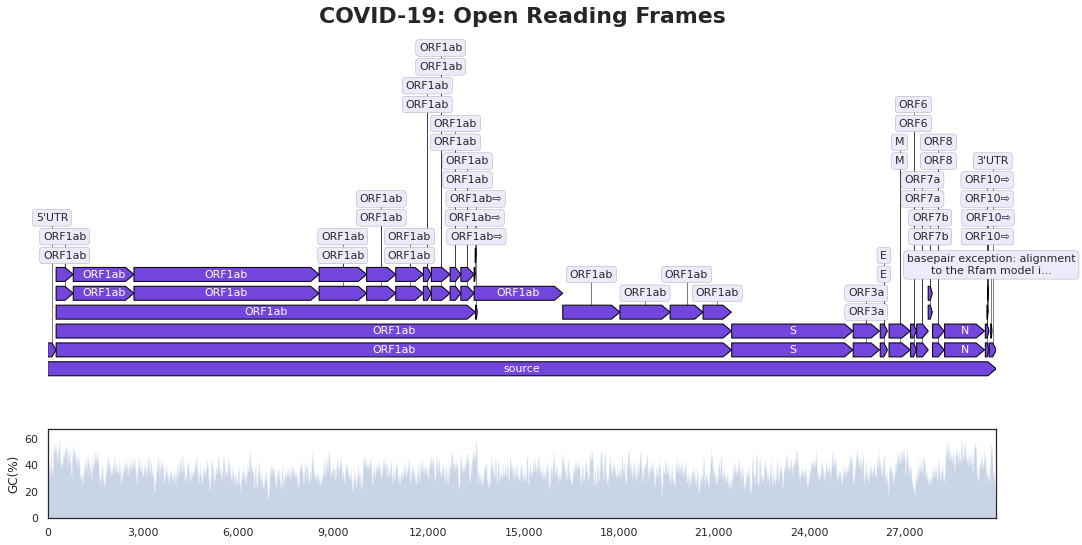

In [120]:
import matplotlib.pyplot as plt
from dna_features_viewer import BiopythonTranslator
from Bio import SeqIO
import numpy as np

fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(17, 9), sharex=True, gridspec_kw={"height_ratios": [4, 1]}
)
ax1.set_title('COVID-19: Open Reading Frames', size=22, weight='bold')



# PLOT THE RECORD MAP
record = SeqIO.read("/kaggle/input/covid19-genbank-file/sequence.gb.txt", "genbank")
graphic_record = BiopythonTranslator().translate_record(record)
graphic_record.plot(ax=ax1, with_ruler=False, strand_in_label_threshold=4)

# PLOT THE LOCAL GC CONTENT (we use 50bp windows)
gc = lambda s: 100.0 * len([c for c in s if c in "GC"]) / 50
xx = np.arange(len(record.seq) - 50)
yy = [gc(record.seq[x : x + 50]) for x in xx]
ax2.fill_between(xx + 25, yy, alpha=0.3)
ax2.set_ylim(bottom=0)
ax2.set_ylabel("GC(%)")
plt.savefig('orfs.png')
plt.show()

The figure above shows the ORFs in the Covid-19 genome, mainly: ORF1ab, ORF3a, E, M, S and N. 

GC content (or guanine-cytosine content) is the percentage of nitrogenous bases in a DNA or RNA molecule that are either guanine (G) or cytosine (C). Evidence of GC ratio with that of length of the coding region of a gene has shown that the length of the coding sequence is directly proportional to higher G+C content. This has been pointed to the fact that the stop codon has a bias towards A and T nucleotides, and, thus, the shorter the sequence the higher the AT bias. So, next thing to do: Find those coding regions CDS.

Finding the coding regions CDS in the Covid-19 genome:
The identification of coding sequences (CDS) is an important step in the functional annotation of genes. CDS is a sequence of nucleotides that corresponds with the sequence of amino acids in a protein. A typical CDS starts with ATG and ends with a stop codon.

The code below highlights the coding regions CDS in red.

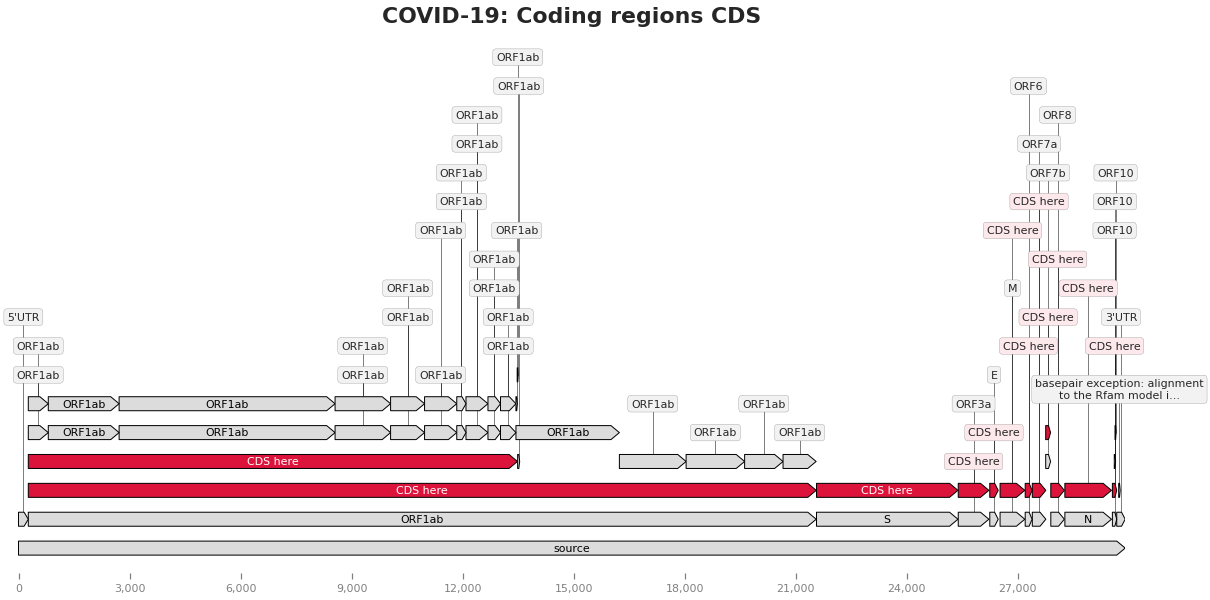

In [121]:
from dna_features_viewer import BiopythonTranslator

class MyCustomTranslator(BiopythonTranslator):
    """Custom translator implementing the following theme:

    - Color terminators in green, CDS in red, all other features in grey.
    - Do not display features that are restriction sites unless they are BamHI
    - Do not display labels for restriction sites
    - For CDS labels just write "CDS here" instead of the name of the gene.

    """

    def compute_feature_color(self, feature):
        if feature.type == "CDS":
            return "crimson"
        elif feature.type == "terminator":
            return "green"
        else:
            return "gainsboro"

    def compute_feature_label(self, feature):
        if feature.type == 'restriction_site':
            return None
        elif feature.type == "CDS":
            return "CDS here"
        else:
            return BiopythonTranslator.compute_feature_label(self, feature)

    def compute_filtered_features(self, features):
        """Do not display promoters. Just because."""
        return [
            feature for feature in features
            if (feature.type != "restriction_site")
            or ("BamHI" in str(feature.qualifiers.get("label", '')))
        ]


graphic_record = MyCustomTranslator().translate_record("/kaggle/input/covid19-genbank-file/sequence.gb.txt")
ax, _ = graphic_record.plot(figure_width=17)
ax.figure.tight_layout()
ax.figure.savefig("custom_bopython_translator.png")
ax.set_title('COVID-19: Coding regions CDS', size=22, weight='bold')
plt.show()

The figure above highlights in red the coding regions CDS in the Covid-19 genome. The main CDS are among the ORFs already found in the previous section, which include the ORF1ab, ORF3a, S protein, M protein and N protein. 

The function below finds the Open Reading Frames in the COVID-19 genome. We set the minimum protein length to 200 amino acids.

In other words, just the ORFs with an amino acid sequence greater than 200 will be considered for further analysis 

ORF Identification

In [122]:
table=11
min_pro_len=200
def find_orfs_with_trans(seq, trans_table, min_protein_length):
    answer = []
    seq_len = len(seq)
    for strand, nuc in [(+1, seq), (-1, seq.reverse_complement())]:
        for frame in range(3):
            trans = str(nuc[frame:].translate(trans_table))
            trans_len = len(trans)
            aa_start = 0
            aa_end = 0
            while aa_start < trans_len:
                aa_end = trans.find("*", aa_start)
                if aa_end == -1:
                    aa_end = trans_len
                if aa_end - aa_start >= min_protein_length:
                    if strand == 1:
                        start = frame + aa_start * 3
                        end = min(seq_len, frame + aa_end * 3 + 3)
                    else:
                        start = seq_len - frame - aa_end * 3 - 3
                        end = seq_len - frame - aa_start * 3
                    answer.append((start, end, strand, trans[aa_start:aa_end]))
                aa_start = aa_end + 1
    answer.sort()
    return answer
orf_list = find_orfs_with_trans(record.seq, table, min_pro_len)
for start, end, strand, pro in orf_list:
    print(
        "%s...%s - length %i, strand %i, %i:%i"
        % (pro[:30], pro[-3:], len(pro), strand, start, end))

PKGKMESLVPGFNEKTHVQLSLPVLQVRDV...FAV - length 4409, strand 1, 253:13483
CTIVFKRVCGVSAARLTPCGTGTSTDVVYR...VNN - length 2701, strand 1, 13449:21555
LEKTTELLFLVMFLLTTKRTMFVFLVLLPL...HYT - length 1293, strand 1, 21502:25384
ASAQRSQITLHINELMDLFMRIFTIGTVTL...VPL - length 290, strand 1, 25347:26220
SSGLNELNIILVFLFGTLILAMADSNGTIT...LVQ - length 243, strand 1, 26459:27191
RSCCFRFHLNEQTKMSDNGPQNQRNAPRIT...TQA - length 433, strand 1, 28231:29533


/opt/conda/lib/python3.7/site-packages/Bio/Seq.py:2338: BiopythonWarning:

Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.



The Covid-19 genome has 6 ORFs with more than 200 amino acids. We run a BLAST search to find out what proteins do those sequences code for. 

In [123]:
orf_list

[(253,
  13483,
  1,
  'PKGKMESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGTCGLVEVEKGVLPQLEQPYVFIKRSDARTAPHGHVMVELVAELEGIQYGRSGETLGVLVPHVGEIPVAYRKVLLRKNGNKGAGGHSYGADLKSFDLGDELGTDPYEDFQENWNTKHSSGVTRELMRELNGGAYTRYVDNNFCGPDGYPLECIKDLLARAGKASCTLSEQLDFIDTKRGVYCCREHEHEIAWYTERSEKSYELQTPFEIKLAKKFDTFNGECPNFVFPLNSIIKTIQPRVEKKKLDGFMGRIRSVYPVASPNECNQMCLSTLMKCDHCGETSWQTGDFVKATCEFCGTENLTKEGATTCGYLPQNAVVKIYCPACHNSEVGPEHSLAEYHNESGLKTILRKGGRTIAFGGCVFSYVGCHNKCAYWVPRASANIGCNHTGVVGEGSEGLNDNLLEILQKEKVNINIVGDFKLNEEIAIILASFSASTSAFVETVKGLDYKAFKQIVESCGNFKVTKGKAKKGAWNIGEQKSILSPLYAFASEAARVVRSIFSRTLETAQNSVRVLQKAAITILDGISQYSLRLIDAMMFTSDLATNNLVVMAYITGGVVQLTSQWLTNIFGTVYEKLKPVLDWLEEKFKEGVEFLRDGWEIVKFISTCACEIVGGQIVTCAKEIKESVQTFFKLVNKFLALCADSIIIGGAKLKALNLGETFVTHSKGLYRKCVKSREETGLLMPLKAPKEIIFLEGETLPTEVLTEEVVLKTGDLQPLEQPTSEAVEAPLVGTPVCINGLMLLEIKDTEKYCALAPNMMVTNNTFTLKGGAPTKVTFGDDTVIEVQGYKSVNITFELDERIDKVLNEKCSAYTVELGTEVNEFACVVADAVIKTLQPVSELLTPLGIDLDEWSMATYYLFDESGEFKLASHMYCSFYPPDEDEEEGDCEEEEFEPSTQYEYGTEDDYQGKPLEFGATSAALQPE

### BLAST search results: COVID-19 ORFs

In [124]:
e={ 'ORF length': [4409,2701,1293,290,243, 433],
   'DB:ID' : ['P0C6U8', 'P0C6X7', 'P59594', 'Q0Q474', 'Q0Q472','P59595']
   ,'protein': ['Replicase polyprotein 1a','Replicase polyprotein 1ab','Spike glycoprotein', 'Protein 3','Membrane protein', 'Nucleoprotein N']
   ,'organism':['Human SARS coronavirus (SARS-CoV)','Human SARS coronavirus (SARS-CoV)',
                           'Human SARS coronavirus (SARS-CoV)', 'Bat coronavirus Rp3/2004',
                           'Bat coronavirus Rp3/2004','Human SARS coronavirus (SARS-CoV)']
   ,'match': ['80%', '96%', '76%', '95%','92%', '91%']
                          
   , 'Function' : ['Multifunctional protein involved in the transcription and replication of viral RNAs. Contains the proteinases responsible for the cleavages of the polyprotein.',
                'Multifunctional protein involved in the transcription and replication of viral RNAs. Contains the proteinases responsible for the cleavages of the polyprotein',
                'attaches the virion to the cell membrane by interacting with host receptor, initiating the infection (By similarity). Binding to human ACE2 and CLEC4M/DC-SIGNR receptors and internalization of the virus into the endosomes of the host cell induces conformational changes in the S glycoprotein. Proteolysis by cathepsin CTSL may unmask the fusion peptide of S2 and activate membranes fusion within endosomes.',
                'Forms homotetrameric potassium sensitive ion channels (viroporin) and may modulate virus release.',
                'Component of the viral envelope that plays a central role in virus morphogenesis and assembly via its interactions with other viral proteins.',
                'Packages the positive strand viral genome RNA into a helical ribonucleocapsid (RNP) and plays a fundamental role during virion assembly through its interactions with the viral genome and membrane protein M']
             }

covid_orf=pd.DataFrame(data=e)
cm = sns.light_palette("red", as_cmap=True)

covid_orf2 = covid_orf.style.background_gradient(cmap=cm)
covid_orf2

,ORF length,DB:ID,protein,organism,match,Function
0,4409,P0C6U8,Replicase polyprotein 1a,Human SARS coronavirus (SARS-CoV),80%,Multifunctional protein involved in the transcription and replication of viral RNAs. Contains the proteinases responsible for the cleavages of the polyprotein.
1,2701,P0C6X7,Replicase polyprotein 1ab,Human SARS coronavirus (SARS-CoV),96%,Multifunctional protein involved in the transcription and replication of viral RNAs. Contains the proteinases responsible for the cleavages of the polyprotein
2,1293,P59594,Spike glycoprotein,Human SARS coronavirus (SARS-CoV),76%,"attaches the virion to the cell membrane by interacting with host receptor, initiating the infection (By similarity). Binding to human ACE2 and CLEC4M/DC-SIGNR receptors and internalization of the virus into the endosomes of the host cell induces conformational changes in the S glycoprotein. Proteolysis by cathepsin CTSL may unmask the fusion peptide of S2 and activate membranes fusion within endosomes."
3,290,Q0Q474,Protein 3,Bat coronavirus Rp3/2004,95%,Forms homotetrameric potassium sensitive ion channels (viroporin) and may modulate virus release.
4,243,Q0Q472,Membrane protein,Bat coronavirus Rp3/2004,92%,Component of the viral envelope that plays a central role in virus morphogenesis and assembly via its interactions with other viral proteins.
5,433,P59595,Nucleoprotein N,Human SARS coronavirus (SARS-CoV),91%,Packages the positive strand viral genome RNA into a helical ribonucleocapsid (RNP) and plays a fundamental role during virion assembly through its interactions with the viral genome and membrane protein M


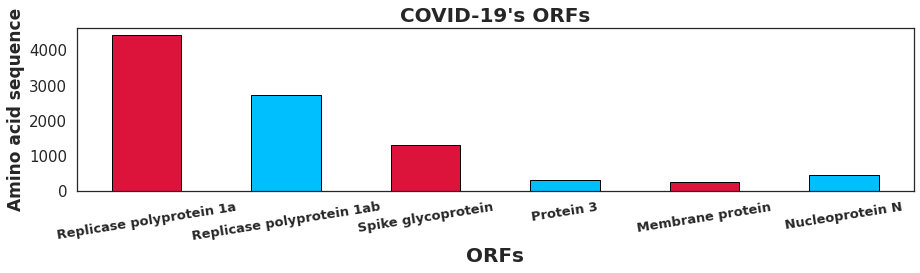

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
covid_orf['ORF length'].plot.bar(color=('crimson','deepskyblue'), edgecolor='black')
plt.xticks(rotation=9)
plt.ylabel("Amino acid sequence", weight='bold', fontsize=17)
plt.yticks(fontsize=15)
r=list(range(len(covid_orf)))
plt.xticks(r, covid_orf.protein, weight='bold', fontsize=13)
plt.xlabel("ORFs", weight='bold', size=20)
plt.title("COVID-19's ORFs", weight='bold', size=20)
plt.show()

Genome analysis is used to find the main COVID-19 viral proteins : Spike protein (S), Nucleoprotein (N), Membrane protein (M), Envelope protein (E) and the replicase polyprotein.

The Open Coding Frames coded for the most important viral proteins in the COVID-19: Replicase polyprotein, Nucleoprotein, Membrane protein and mainly the Spike glycoprotein. The Spike glycoprotein (S) is the main protein candidate for vaccine development. In studies related to SARS-CoV, vaccine candidates were developped expressing the membrane-anchored SARS-CoV spike (S) protein.

The spike glycoprotein (or just “spike protein”) is the spike that studs the surface of the coronavirus, giving it the appearance of a crown to electron microscopy.

The S protein is responsible for facilitating entry of the CoV into the target cell. It is composed of a short intracellular tail, a transmembrane anchor, and a large ectodomain that consists of a receptor binding S1 subunit and a membrane-fusing S2 subunit. In the previous section, our sequence analysis of the SARS-CoV-2 S protein genome showed that it was only 76% identical with the SARS-CoV S protein.

In [126]:
covid_orf.iloc[2].to_frame().T

,ORF length,DB:ID,protein,organism,match,Function
2,1293,P59594,Spike glycoprotein,Human SARS coronavirus (SARS-CoV),76%,"attaches the virion to the cell membrane by interacting with host receptor, initiating the infection (By similarity). Binding to human ACE2 and CLEC4M/DC-SIGNR receptors and internalization of the virus into the endosomes of the host cell induces conformational changes in the S glycoprotein. Proteolysis by cathepsin CTSL may unmask the fusion peptide of S2 and activate membranes fusion within endosomes."


In [127]:
#spike= orf_list[2]
spike='LEKTTELLFLVMFLLTTKRTMFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDDSEPVLKGVKLHYT'

#Calculate amino acids frequency
def char_frequency(str1):
    dict = {}
    for n in str1:
        keys = dict.keys()
        if n in keys:
            dict[n] += 1
        else:
            dict[n] = 1
    return dict
print(char_frequency(spike))
amino_acids=char_frequency(spike)

#Get amino acids dataset
aas= pd.DataFrame(data=amino_acids, index=[0]).T.reset_index()
aas= aas.rename(columns={0: 'frequency', 'index': 'amino_acids'})
aas=aas.sort_values(by=['frequency'], ascending=True)

{'L': 114, 'E': 50, 'K': 63, 'T': 102, 'F': 79, 'V': 98, 'M': 15, 'R': 43, 'P': 58, 'S': 99, 'Q': 62, 'C': 40, 'N': 88, 'A': 79, 'Y': 54, 'G': 82, 'D': 62, 'H': 17, 'W': 12, 'I': 76}


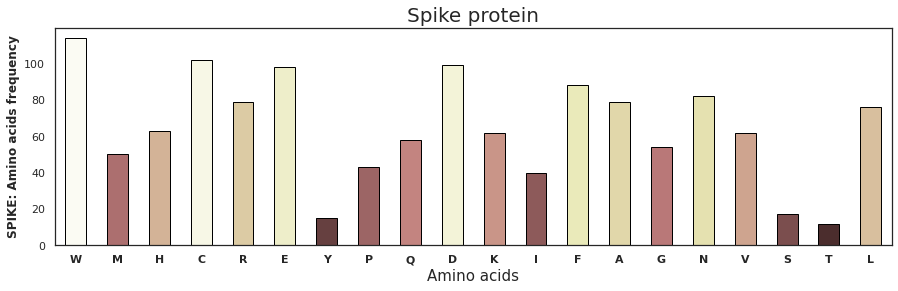

In [128]:
#plot the amino acids frequency
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
a= aas['frequency'].plot.bar(color=sns.color_palette('pink',len(aas)), edgecolor='black')
plt.xticks(rotation=0)
plt.ylabel("SPIKE: Amino acids frequency", weight='bold')
r=list(range(len(aas)))
plt.xticks(r, aas.amino_acids, weight='bold')
plt.xlabel("Amino acids", size=15)
plt.title("Spike protein",  size=20)
plt.show()

In [129]:
spike_covid= 'MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDDSEPVLKGVKLHYT'
spike_sars= 'MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEIFRSDTLYLTQDLFLPFYSNVTGFHTINHTFGNPVIPFKDGIYFAATEKSNVVRGWVFGSTMNNKSQSVIIINNSTNVVIRACNFELCDNPFFAVSKPMGTQTHTMIFDNAFNCTFEYISDAFSLDVSEKSGNFKHLREFVFKNKDGFLYVYKGYQPIDVVRDLPSGFNTLKPIFKLPLGINITNFRAILTAFSPAQDIWGTSAAAYFVGYLKPTTFMLKYDENGTITDAVDCSQNPLAELKCSVKSFEIDKGIYQTSNFRVVPSGDVVRFPNITNLCPFGEVFNATKFPSVYAWERKKISNCVADYSVLYNSTFFSTFKCYGVSATKLNDLCFSNVYADSFVVKGDDVRQIAPGQTGVIADYNYKLPDDFMGCVLAWNTRNIDATSTGNYNYKYRYLRHGKLRPFERDISNVPFSPDGKPCTPPALNCYWPLNDYGFYTTTGIGYQPYRVVVLSFELLNAPATVCGPKLSTDLIKNQCVNFNFNGLTGTGVLTPSSKRFQPFQQFGRDVSDFTDSVRDPKTSEILDISPCSFGGVSVITPGTNASSEVAVLYQDVNCTDVSTAIHADQLTPAWRIYSTGNNVFQTQAGCLIGAEHVDTSYECDIPIGAGICASYHTVSLLRSTSQKSIVAYTMSLGADSSIAYSNNTIAIPTNFSISITTEVMPVSMAKTSVDCNMYICGDSTECANLLLQYGSFCTQLNRALSGIAAEQDRNTREVFAQVKQMYKTPTLKYFGGFNFSQILPDPLKPTKRSFIEDLLFNKVTLADAGFMKQYGECLGDINARDLICAQKFNGLTVLPPLLTDDMIAAYTAALVSGTATAGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKQIANQFNKAISQIQESLTTTSTALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQAAPHGVVFLHVTYVPSQERNFTTAPAICHEGKAYFPREGVFVFNGTSWFITQRNFFSPQIITTDNTFVSGNCDVVIGIINNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYVWLGFIAGLIAIVMVTILLCCMTSCCSCLKGACSCGSCCKFDEDDSEPVLKGVKLHYT'